# 0. Table of Content

- [1 Exploratory Data Analysis](#1-exploratory-data-analysis)
- [2 Method 1: Logistic Regression](#2-method-1:-logistic-regression)
- [3 Method 2: Paired t-test](#3-method-2:-paired-t-test)
- [4 Conclusion](#4-conclusion)

# 1. Exploratory Data Analysis
## 1.1 Loading the data set.


In [69]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import math
import statsmodels.api as sm
import scipy.stats as stats

#Define filename and directory of the dataset
name = 'augmento_btc.csv'

#Load dataset using pandas read_excel function, setting header=1 to use first row as column names for DataFrame
sentiment_data = pd.read_csv(name, header=0)

## 1.2 Variable types and dimensions

In [70]:
#Print types of data present in set and shape of dataset
print(sentiment_data.dtypes)
print('Dimensions of dataset:', sentiment_data.shape)
# Filter the dataset to only include the listing close and reddit columns

twitter_columns = [
    'twitter_fomo',
    'twitter_uncertain',
    'twitter_hopeful',
    'twitter_bearish',
    'twitter_pessimistic_doubtful',
    'twitter_sad',
    'twitter_fearful_concerned',
    'twitter_angry',
    'twitter_mistrustful',
    'twitter_panicking',
    'twitter_annoyed_frustrated',
    'twitter_bullish',
    'twitter_optimistic',
    'twitter_happy',
    'twitter_euphoric_excited',
]

reddit_columns = [
    'reddit_fomo',
    'reddit_uncertain',
    'reddit_hopeful',
    'reddit_bearish',
    'reddit_pessimistic_doubtful',
    'reddit_sad',
    'reddit_fearful_concerned',
    'reddit_angry',
    'reddit_mistrustful',
    'reddit_panicking',
    'reddit_annoyed_frustrated',
    'reddit_bullish',
    'reddit_optimistic',
    'reddit_happy',
    'reddit_euphoric_excited',
]

bitcointalk_columns = [
    'bitcointalk_fomo',
    'bitcointalk_uncertain',
    'bitcointalk_hopeful',
    'bitcointalk_bearish',
    'bitcointalk_pessimistic_doubtful',
    'bitcointalk_sad',
    'bitcointalk_fearful_concerned',
    'bitcointalk_angry',
    'bitcointalk_mistrustful',
    'bitcointalk_panicking',
    'bitcointalk_annoyed_frustrated',
    'bitcointalk_bullish',
    'bitcointalk_optimistic',
    'bitcointalk_happy',
    'bitcointalk_euphoric_excited',
]

all_colums = twitter_columns + reddit_columns + bitcointalk_columns
select_data = sentiment_data[all_colums]

print(select_data.head())

date                             object
listing_close                   float64
twitter_hacks                   float64
twitter_pessimistic_doubtful    float64
twitter_banks                   float64
                                 ...   
reddit_rumor                    float64
reddit_scam_fraud               float64
reddit_airdrop                  float64
reddit_optimistic               float64
reddit_negative                 float64
Length: 281, dtype: object
Dimensions of dataset: (71869, 281)
   twitter_fomo  twitter_uncertain  twitter_hopeful  twitter_bearish  \
0           0.0                2.0              0.0              0.0   
1           0.0                0.0              0.0              1.0   
2           0.0                0.0              0.0              0.0   
3           0.0                0.0              0.0              1.0   
4           0.0                1.0              0.0              0.0   

   twitter_pessimistic_doubtful  twitter_sad  twitter_fearful_co

# 2 Data cleaning
## 2.1 Data types in columns
- **Only numbers of type float present...good**




In [71]:
def which_types(column): #Function to identify datatypes of each variable and reduce code redundancy
    types = []
    print(column.name, 'structure:')
    for entry in column:
        if type(entry) not in types:
            types.append(type(entry))
            print(type(entry))
            print(entry)  

#Print types of data present in all reddit columns
for column in  select_data.columns:
    which_types(select_data[column])

twitter_fomo structure:
<class 'float'>
0.0
twitter_uncertain structure:
<class 'float'>
2.0
twitter_hopeful structure:
<class 'float'>
0.0
twitter_bearish structure:
<class 'float'>
0.0
twitter_pessimistic_doubtful structure:
<class 'float'>
0.0
twitter_sad structure:
<class 'float'>
0.0
twitter_fearful_concerned structure:
<class 'float'>
0.0
twitter_angry structure:
<class 'float'>
0.0
twitter_mistrustful structure:
<class 'float'>
0.0
twitter_panicking structure:
<class 'float'>
0.0
twitter_annoyed_frustrated structure:
<class 'float'>
0.0
twitter_bullish structure:
<class 'float'>
1.0
twitter_optimistic structure:
<class 'float'>
0.0
twitter_happy structure:
<class 'float'>
0.0
twitter_euphoric_excited structure:
<class 'float'>
2.0
reddit_fomo structure:
<class 'float'>
0.0
reddit_uncertain structure:
<class 'float'>
1.0
reddit_hopeful structure:
<class 'float'>
0.0
reddit_bearish structure:
<class 'float'>
0.0
reddit_pessimistic_doubtful structure:
<class 'float'>
1.0
reddit_sad

## 2.2 Clean columns individually
-**No need to clean columns**

In [72]:
#Create function to clean columns on common error types, to reduce code redundancy
def clean_column(column):
    i=0
    for entry in column:
        if isinstance(entry, int):
            entry = float(entry)
            select_data.loc[i,column.name] = entry 
        if isinstance(entry, float):
            entry = str(entry)
            entry = entry.replace('.','')
            entry = float(entry)
            select_data.loc[i,column.name] = entry 
        if isinstance(entry, str):
            entry = entry.replace(',','')
            entry = float(entry)
            select_data.loc[i,column.name] = entry 
        i+=1

#Call cleaning function on the columns we want to clean

## 2.3 Check for successful cleaning
-**Not needed**

In [73]:
#Call type function again to check for successfull cleaning
for column in  select_data.columns:
    which_types(select_data[column])

twitter_fomo structure:
<class 'float'>
0.0
twitter_uncertain structure:
<class 'float'>
2.0
twitter_hopeful structure:
<class 'float'>
0.0
twitter_bearish structure:
<class 'float'>
0.0
twitter_pessimistic_doubtful structure:
<class 'float'>
0.0
twitter_sad structure:
<class 'float'>
0.0
twitter_fearful_concerned structure:
<class 'float'>
0.0
twitter_angry structure:
<class 'float'>
0.0
twitter_mistrustful structure:
<class 'float'>
0.0
twitter_panicking structure:
<class 'float'>
0.0
twitter_annoyed_frustrated structure:
<class 'float'>
0.0
twitter_bullish structure:
<class 'float'>
1.0
twitter_optimistic structure:
<class 'float'>
0.0
twitter_happy structure:
<class 'float'>
0.0
twitter_euphoric_excited structure:
<class 'float'>
2.0
reddit_fomo structure:
<class 'float'>
0.0
reddit_uncertain structure:
<class 'float'>
1.0
reddit_hopeful structure:
<class 'float'>
0.0
reddit_bearish structure:
<class 'float'>
0.0
reddit_pessimistic_doubtful structure:
<class 'float'>
1.0
reddit_sad

## 2.4 Create (cleaned) dataset for project
-**Create dataset to only contain reddit features**

-**Check for NaN values**

In [74]:
#Format cleaned_set to be of type int, as we deal with integers from counting data and to have consistent formatting with 'Explicit track'
select_data = select_data.astype(float)

#Check if all datatypes in dataset are now consistent and free of NaN values
print(select_data.dtypes)
print(select_data.head())
select_data.isna().sum()

twitter_fomo                        float64
twitter_uncertain                   float64
twitter_hopeful                     float64
twitter_bearish                     float64
twitter_pessimistic_doubtful        float64
twitter_sad                         float64
twitter_fearful_concerned           float64
twitter_angry                       float64
twitter_mistrustful                 float64
twitter_panicking                   float64
twitter_annoyed_frustrated          float64
twitter_bullish                     float64
twitter_optimistic                  float64
twitter_happy                       float64
twitter_euphoric_excited            float64
reddit_fomo                         float64
reddit_uncertain                    float64
reddit_hopeful                      float64
reddit_bearish                      float64
reddit_pessimistic_doubtful         float64
reddit_sad                          float64
reddit_fearful_concerned            float64
reddit_angry                    

twitter_fomo                        0
twitter_uncertain                   0
twitter_hopeful                     0
twitter_bearish                     0
twitter_pessimistic_doubtful        0
twitter_sad                         0
twitter_fearful_concerned           0
twitter_angry                       0
twitter_mistrustful                 0
twitter_panicking                   0
twitter_annoyed_frustrated          0
twitter_bullish                     0
twitter_optimistic                  0
twitter_happy                       0
twitter_euphoric_excited            0
reddit_fomo                         0
reddit_uncertain                    0
reddit_hopeful                      0
reddit_bearish                      0
reddit_pessimistic_doubtful         0
reddit_sad                          0
reddit_fearful_concerned            0
reddit_angry                        0
reddit_mistrustful                  0
reddit_panicking                    0
reddit_annoyed_frustrated           0
reddit_bulli

# 3 Discriptive statistics
## 3.1 Cumulative distribution
We start our discriptive statistical analysis, by plotting the cumulative distribution of values for each variable of interest, to investigate the likelihood of each variable to take a certain value and hoping especially to gain insights regarding our second hypothesis.

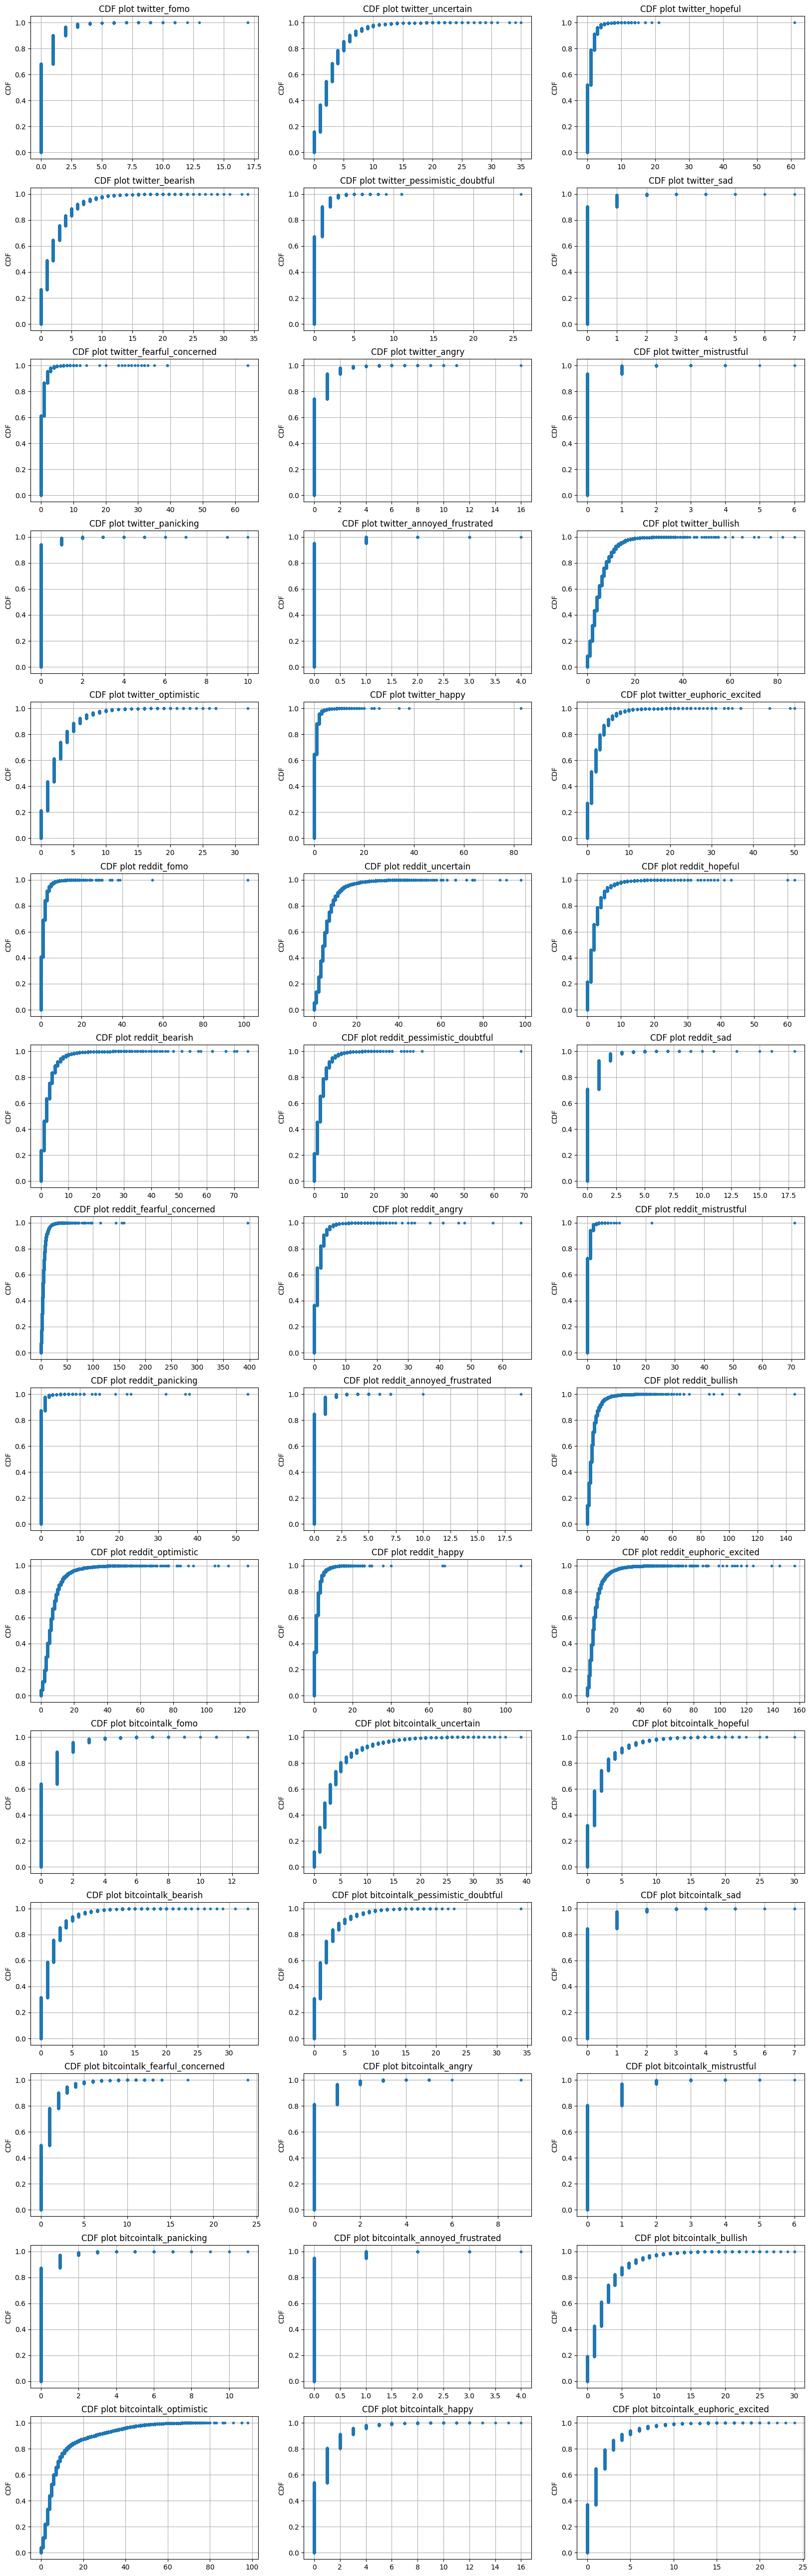

In [75]:
#Function to plot the CDF of a variable and reduce code redundancy
def plot_cdf(columns):
    n_cols = len(columns.shape)
    grid = n_cols/3
    plt.figure(figsize=(20, 200))
    i=0
    g=0
    if n_cols == 1:
        n_plots = 1
    elif n_cols > 1:
        n_plots = columns.shape[1]
    for i in range(0,n_plots):
        plt.subplot(n_plots, 3, i+1)
        sorted = np.sort(columns.iloc[:,i])
        cdf = np.arange(1, len(sorted) + 1) / len(sorted)
        plt.plot(sorted, cdf, marker='.', linestyle='none')
        title = 'CDF plot ' + str(columns.iloc[:,i].name)
        plt.title(title)
        plt.ylabel('CDF')
        plt.grid(True)
        i+=1
    plt.show()

# Plot the CDF for the filtered data
plot_cdf(select_data)

Looking at the different CDF plots of our variables of interest, we can gather first insights about our data with respect to our research questions.
First of all, we can see that YouTube views and Pandora Track stations exhibit a steep increase, which indicates a skewed value distribution, where observations are likely to have a lower value.
The CDF plot of Spotify Streams and Spotify Playlist count are less skewed, which already delivers a first indication of difference in streaming success, that is especially of interest for our second research question.

## 3.2 Kernel density
The discrepancy of the cumulative value distributions for Spotify data and the other streaming platforms motivated us to further analyse the density ditribution across these platforms.
We therefore hope to gain further insights on skewness, kurtosis, and outliers in the variables.

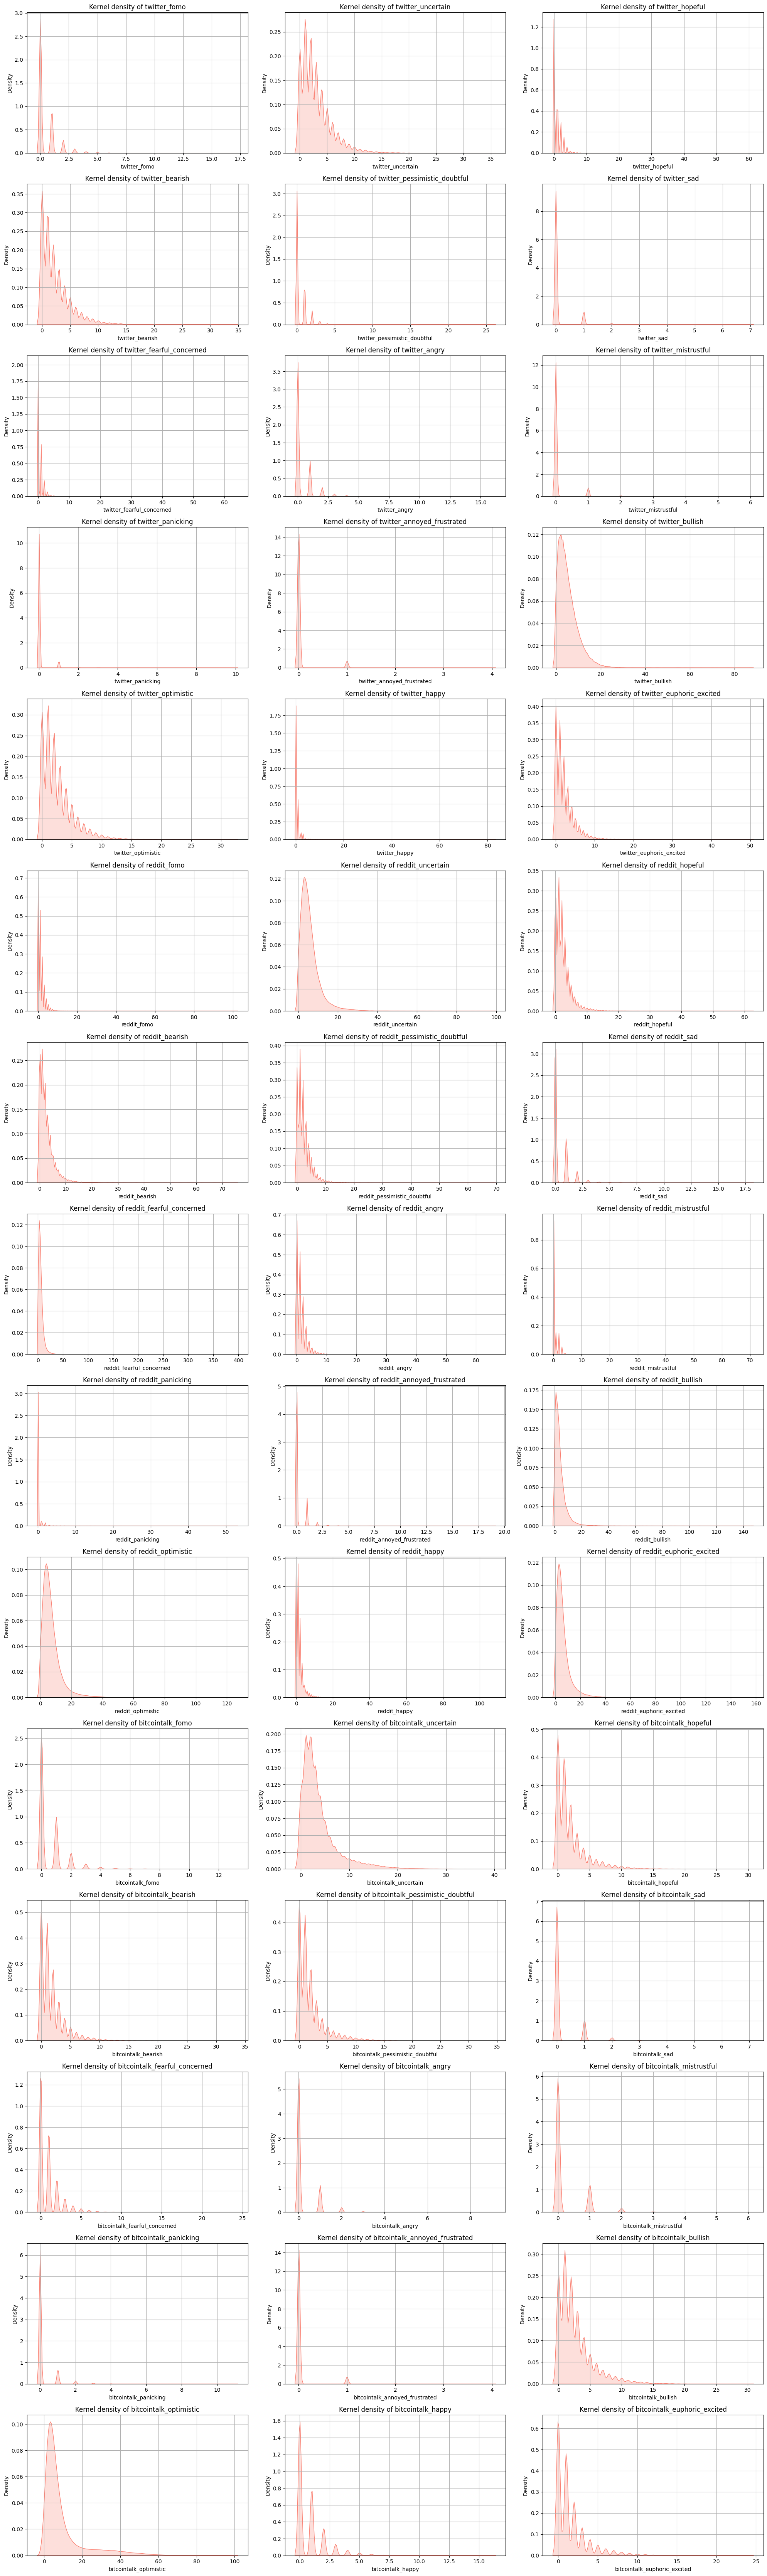

In [76]:
#Function to plot the kernel density of a variable and reduce code redundancy
def plot_kernel_density(columns):
    n_cols = len(columns.shape)
    plt.figure(figsize=(20, 200))
    grid = n_cols/3
    i=0
    if n_cols == 1:
        n_plots = 1
    elif n_cols > 1:
        n_plots = columns.shape[1]
    for i in range(0,n_plots):
        plt.subplot(n_plots, 3, i+1)
        sns.kdeplot(columns.iloc[:,i], fill=True, color='salmon',)
        title = 'Kernel density of ' + str(columns.iloc[:,i].name)
        plt.title(title)
        plt.ylabel('Density')
        plt.grid(True)
        plt.tight_layout()
    plt.show()

# Plot the CDF for the filtered data
plot_kernel_density(select_data)

**Right skewed with a lot of outliers**

## 3.3 Boxplots
Lastly we decide to use Boxplots as a method to take a closer look at outliers and the interquartile range of each variable.
Furthermore, we want to examine the 

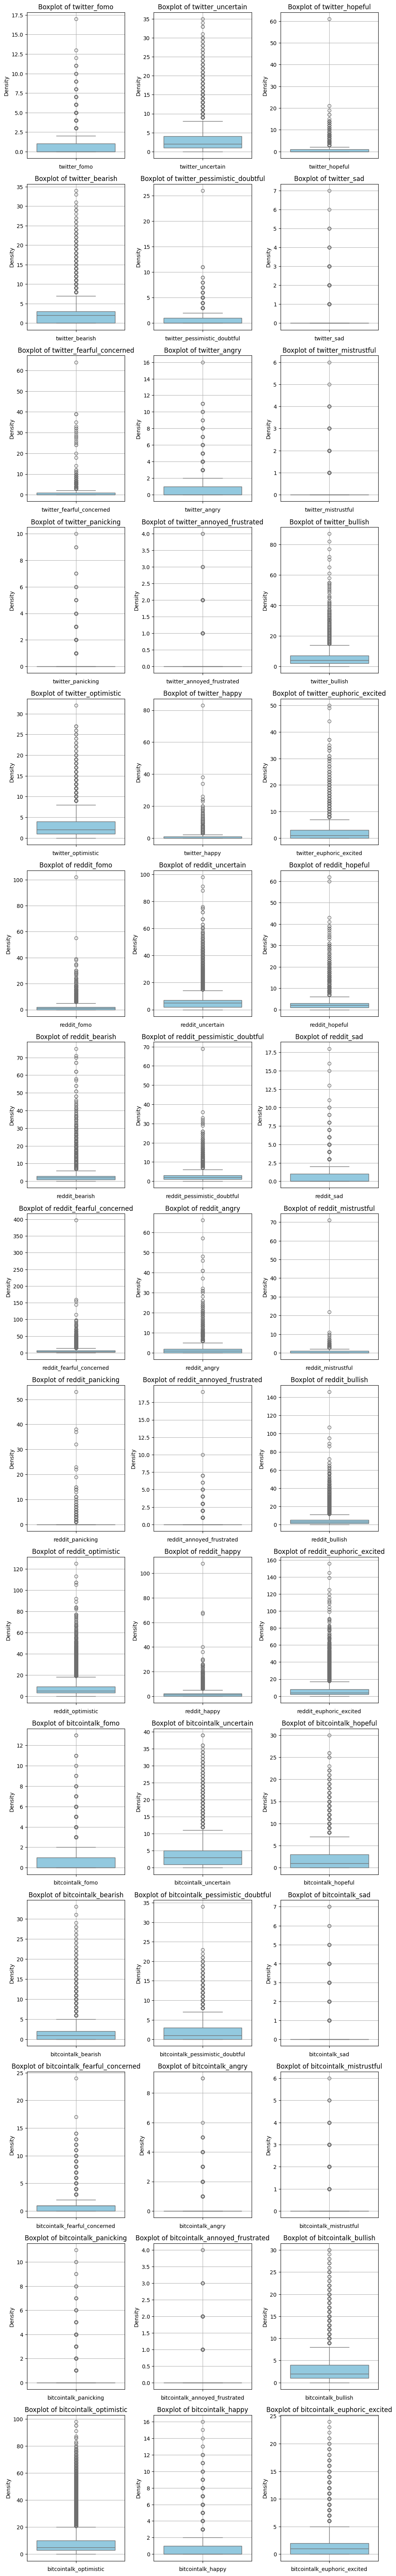

In [77]:
#Create boxplot function to reduce code reduncdancy
def plot_boxplot(columns):
    n_cols = len(columns.shape)
    plt.figure(figsize=(10, 200))
    grid = n_cols/3
    i=0
    if n_cols == 1:
        n_plots = 1
    elif n_cols > 1:
        n_plots = columns.shape[1]
    for i in range(0,n_plots):
        plt.subplot(n_plots, 3, i+1)
        sns.boxplot(y=columns.iloc[:,i], color='skyblue')
        title = 'Boxplot of ' + str(columns.iloc[:,i].name)
        plt.title(title)
        plt.xlabel(columns.iloc[:,i].name)
        plt.ylabel('Density')
        plt.grid(True)
        plt.tight_layout()
    plt.show()

# Plot the CDF for the filtered data
plot_boxplot(select_data)

-**Large amounts of outliers present in most variables and right skewed**

## 3.4 Correlation matrices

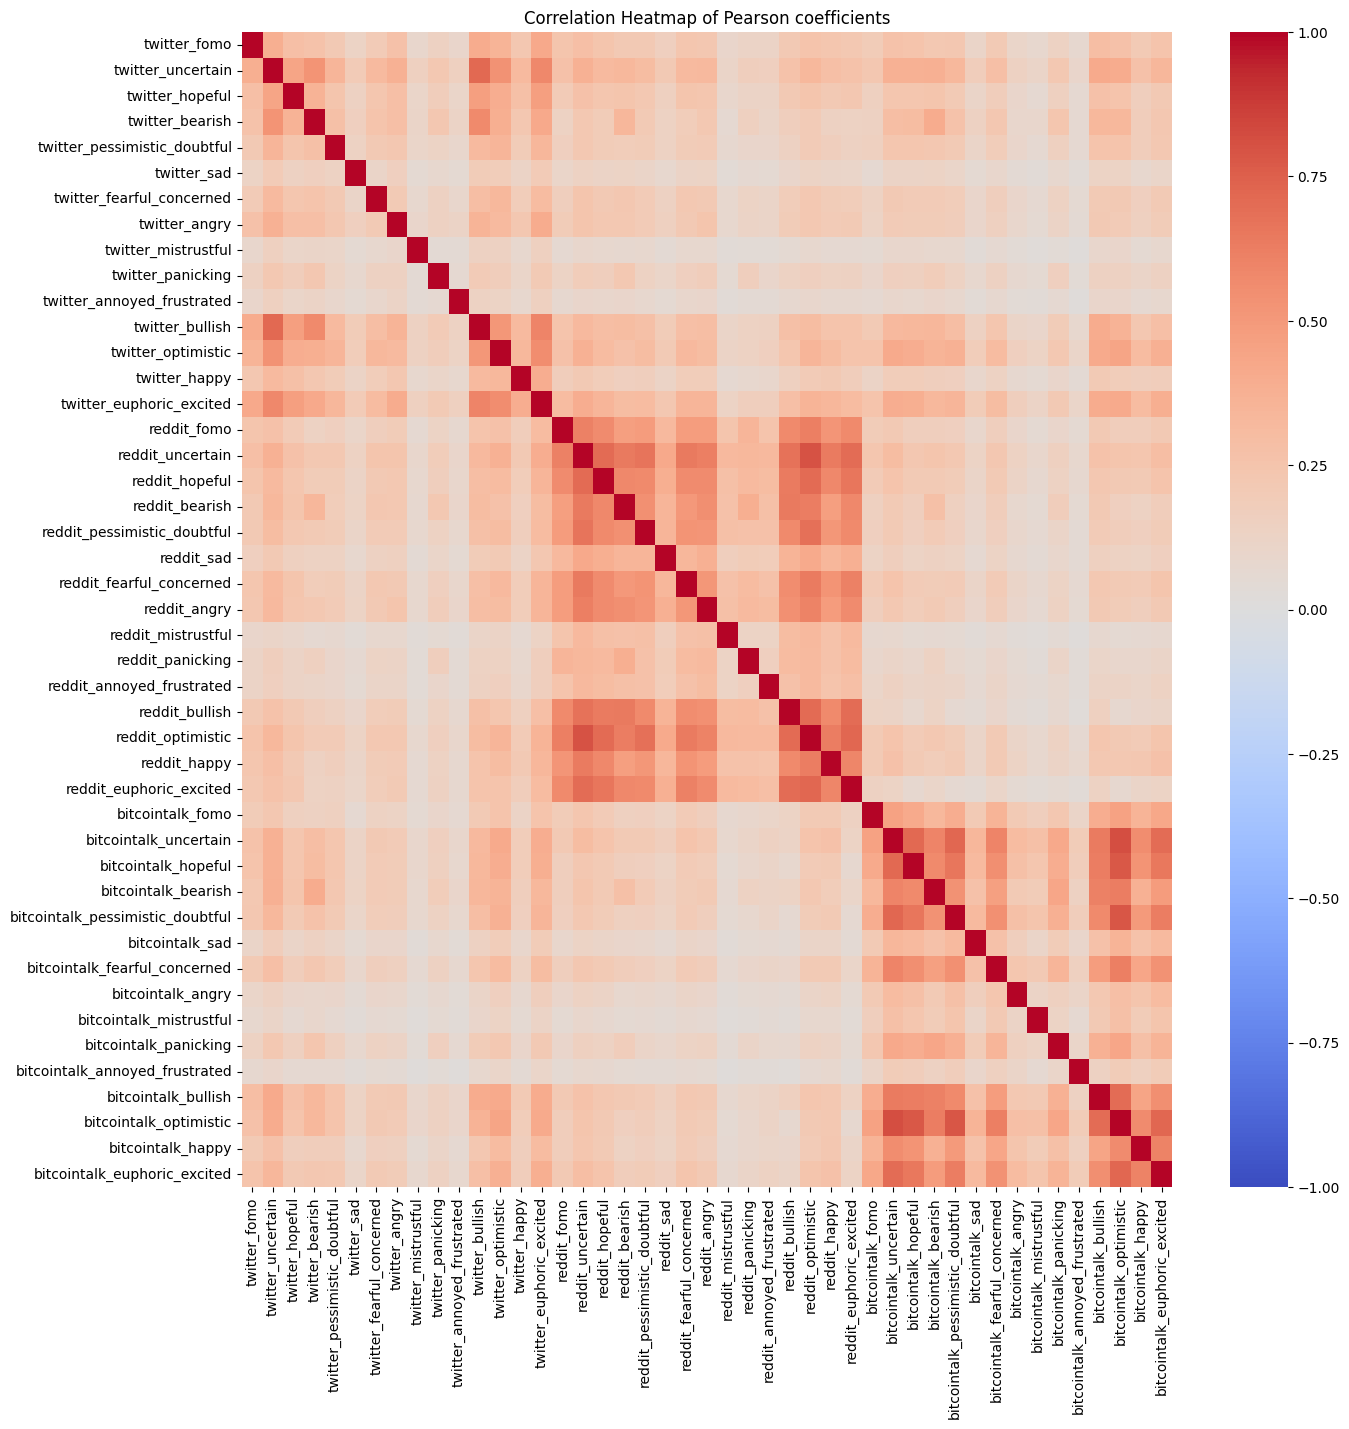

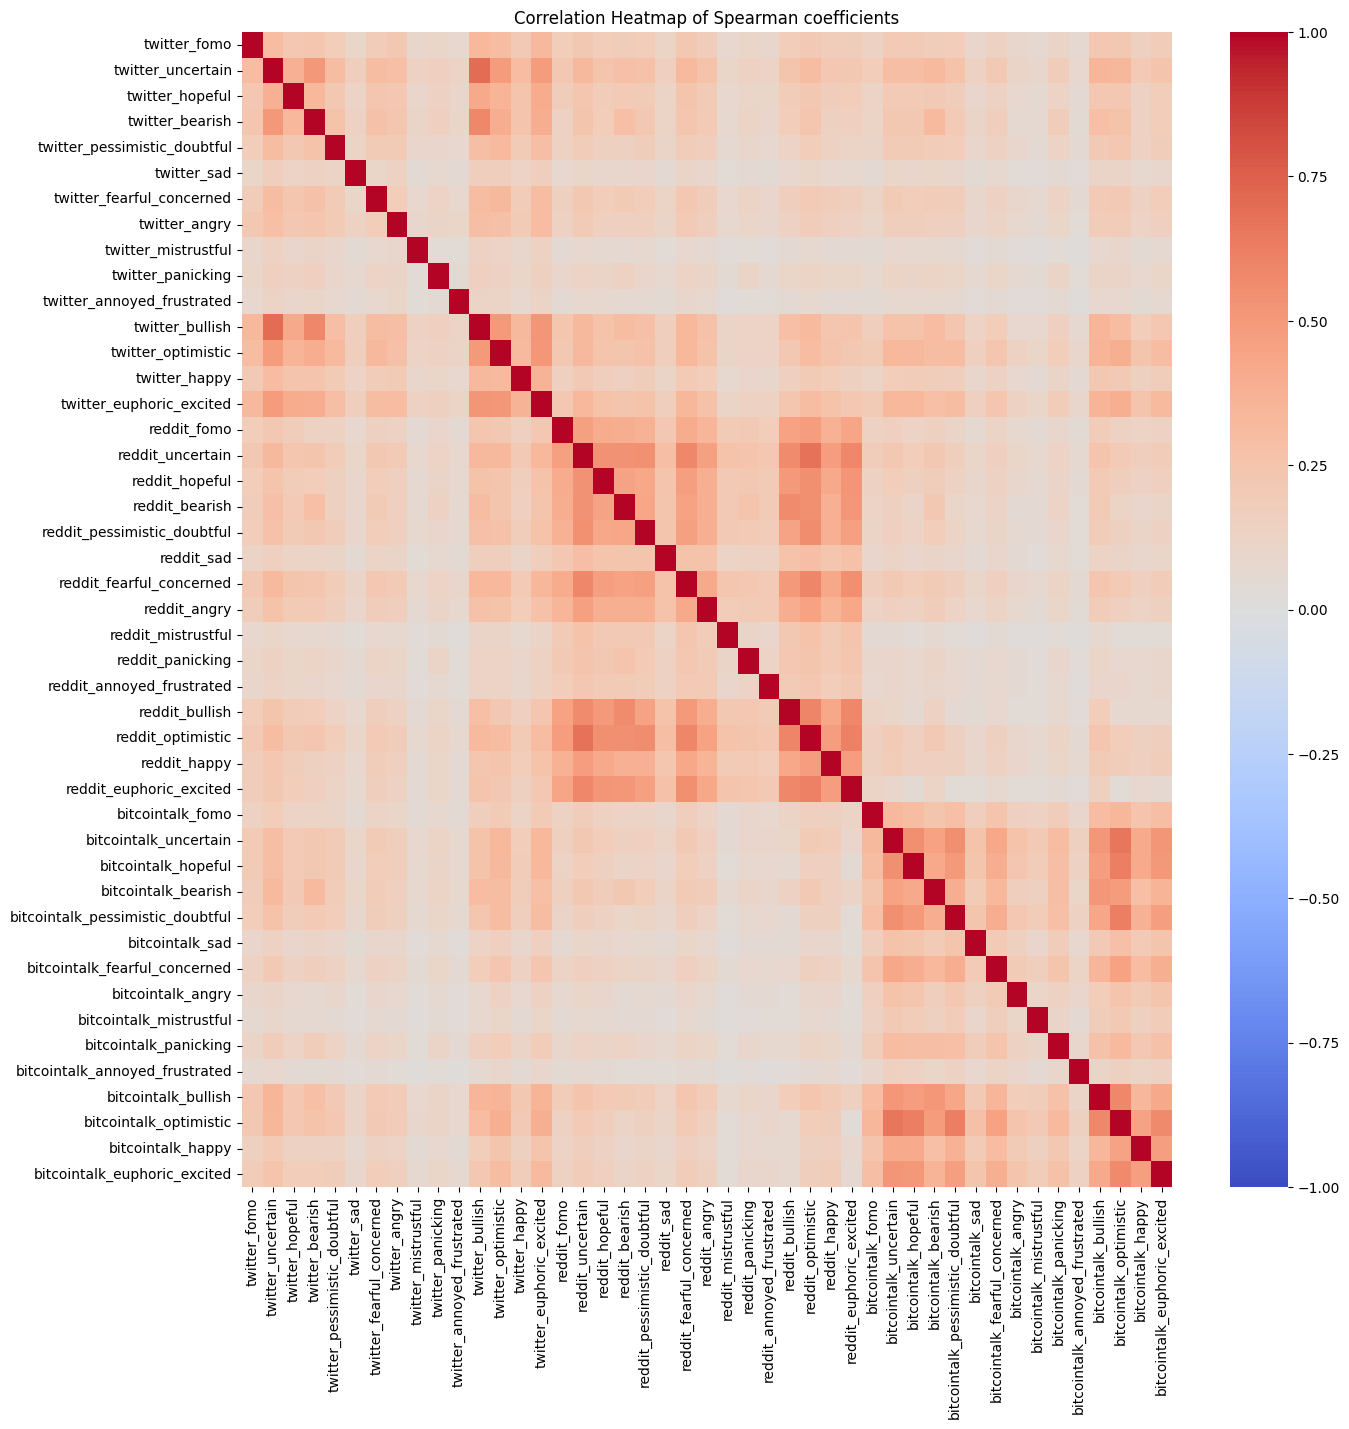

In [78]:
#Compute pearson correlation matrix 
pearson_corr = select_data.corr(method='pearson')

#Compute spearman correlation matrix 
spearman_corr = select_data.corr(method='spearman')

#Make heatmaps for better visualization 
plt.figure(figsize=(15, 15))
sns.heatmap(pearson_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pearson coefficients')
plt.show()

plt.figure(figsize=(15, 15))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Spearman coefficients')
plt.show()

-**Strong correlations between features !**

## 3.5 Log transformation
-**To reduce impact of outliers and achieve better distributed features**

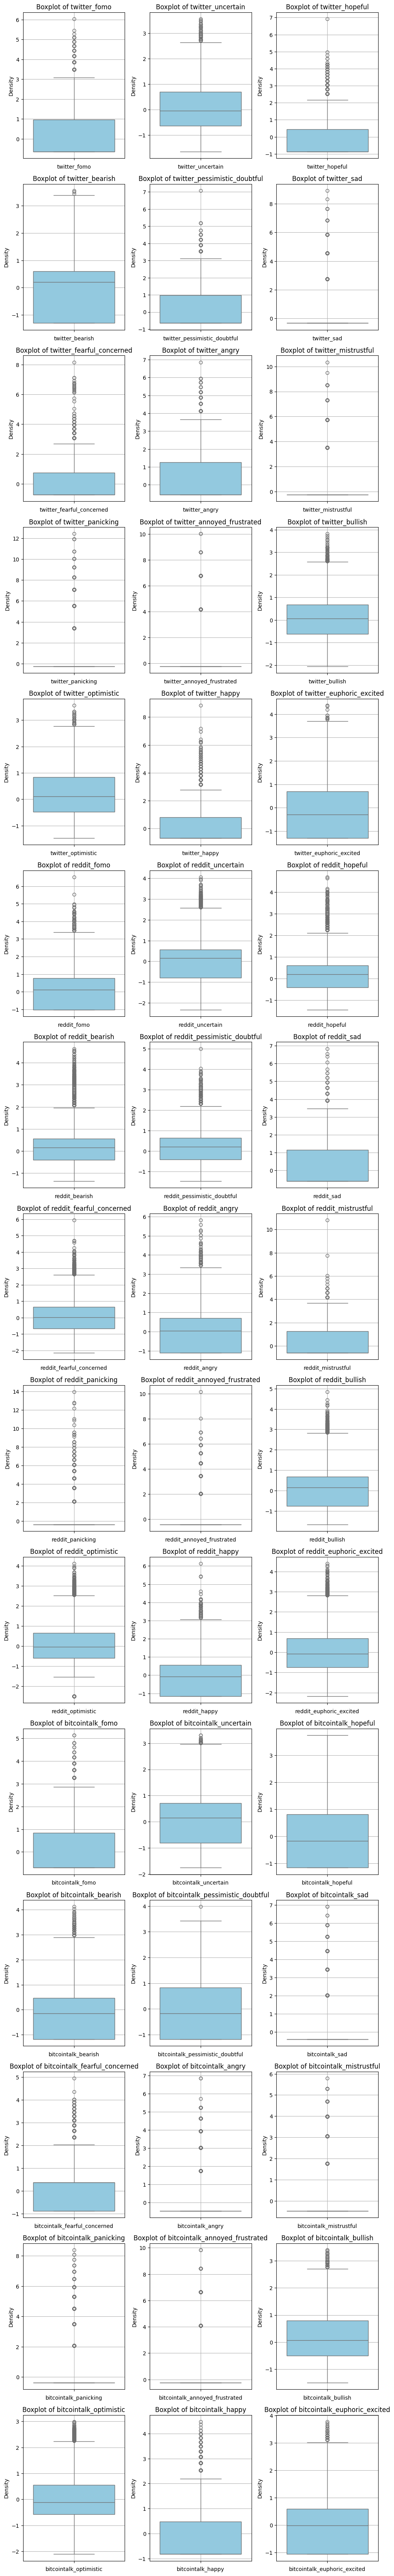

In [79]:
#Log transformation of variables to reduce skewness


transformed_select_data = np.log(select_data+1)

# Standardization of variables to have mean 0 and standard deviation 1
scaler = StandardScaler()
transformed_select_data = pd.DataFrame(scaler.fit_transform(transformed_select_data), columns=select_data.columns)

plot_boxplot(transformed_select_data)

-**Transformation improved distribution for some variables and reduced the impact of outliers**

## 3.6 K-means clustering

/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kme

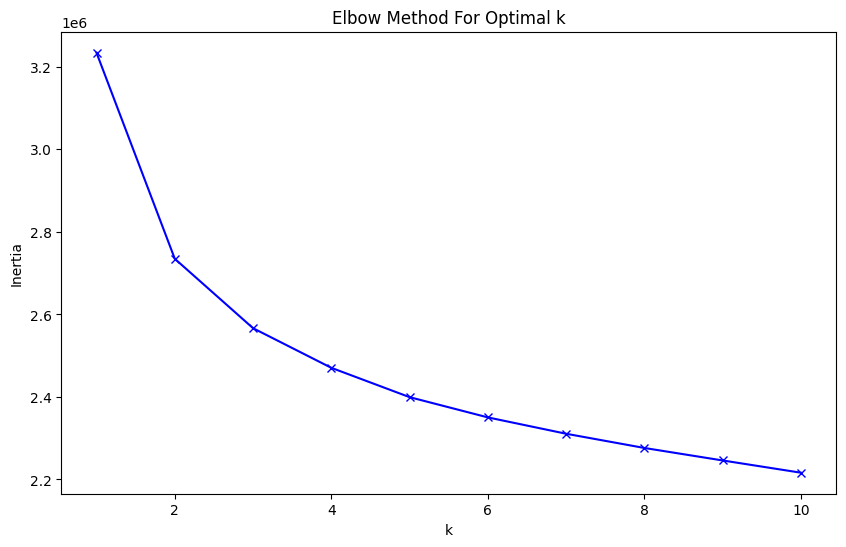

In [80]:
# Implement elbow method to find optimal k
inertia = []
k_range = range(1, 11)  # Test k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_select_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


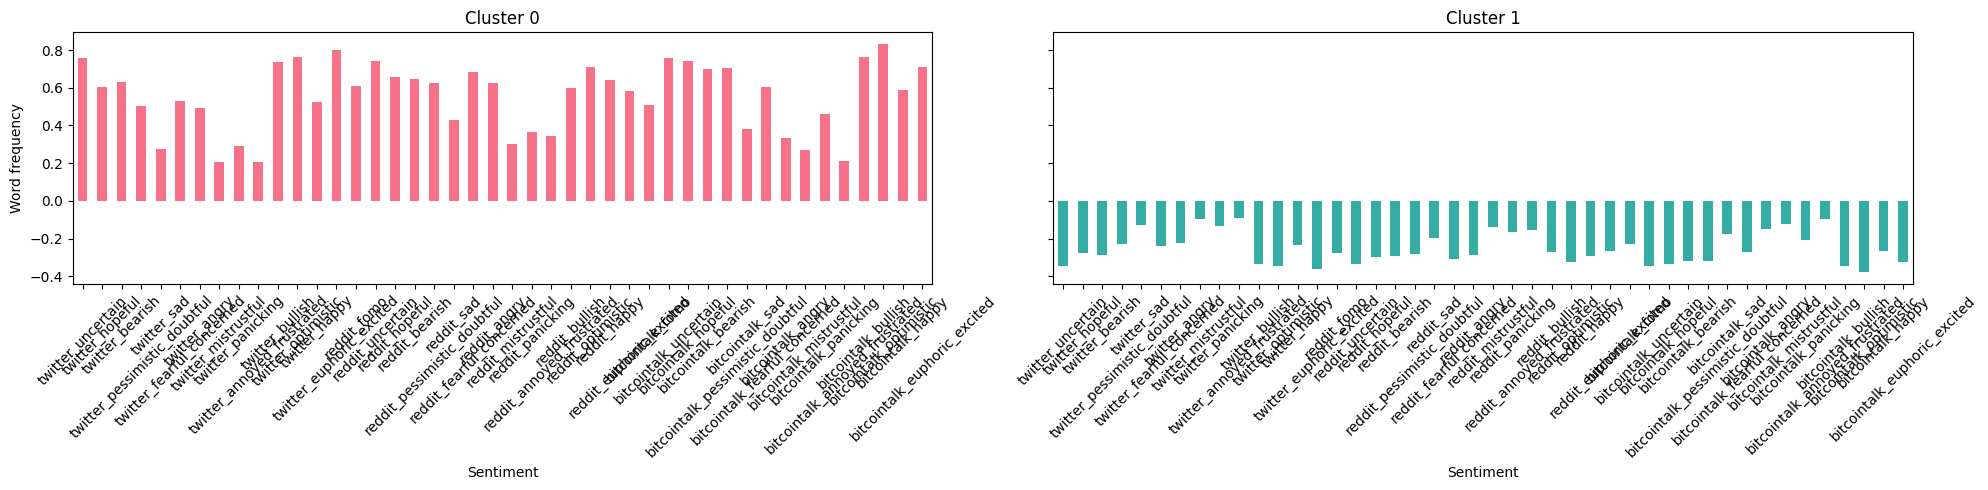

twitter_uncertain  twitter_hopeful  twitter_bearish  \
cluster_kmeans                                                        
0                        0.757677         0.605356         0.629241   
1                       -0.344085        -0.274911        -0.285758   

                twitter_pessimistic_doubtful  twitter_sad  \
cluster_kmeans                                              
0                                   0.504608     0.277345   
1                                  -0.229159    -0.125951   

                twitter_fearful_concerned  twitter_angry  twitter_mistrustful  \
cluster_kmeans                                                                  
0                                0.527753       0.493102             0.208305   
1                               -0.239669      -0.223933            -0.094598   

                twitter_panicking  twitter_annoyed_frustrated  ...  \
cluster_kmeans                                                 ...   
0                        0.292904                    0.204387  ...   
1                       -0.133017                   -0.092818  ...   

                bitcointalk_sad  bitcointalk_fearful_concerned  \
cluster_kmeans                                                   
0                      0.382198                       0.601452   
1                     -0.173568                      -0.273139   

                bitcointalk_angry  bitcointalk_mistrustful  \
cluster_kmeans                                               
0                        0.332216                 0.270133   
1                       -0.150870                -0.122676   

                bitcointalk_panicking  bitcointalk_annoyed_frustrated  \
cluster_kmeans                                                          
0                            0.461318                        0.211201   
1                           -0.209499                       -0.095913   

                bitcointalk_bullish  bitcointalk_optimistic  \
cluster_kmeans                                                
0                          0.760507                0.833139   
1                         -0.345370               -0.378355   

                bitcointalk_happy  bitcointalk_euphoric_excited  
cluster_kmeans                                                   
0                        0.587008                      0.711148  
1                       -0.266579                     -0.322955  

[2 rows x 44 columns]

In [81]:
#K means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
transformed_select_data['cluster_kmeans'] = kmeans.fit_predict(transformed_select_data)

# INSTRUCTION: group the observation by clusters and compute the mean of all variables except the user ID.
grouped_df = transformed_select_data.iloc[:,1:].groupby('cluster_kmeans').mean()

# Set up the figure and axis for subplots
num_clusters = k
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5), sharey=True)

# Define colors for the bars
colors = sns.color_palette('husl', num_clusters)

# Plot each cluster's data in its subplot
for i in range(num_clusters):
    ax = axes[i]
    cluster_data = grouped_df.iloc[i,:] 
    cluster_data.plot(kind='bar', ax=ax, color=colors[i], legend=False)
    
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Word frequency')
    ax.set_xticklabels(cluster_data.index, rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

grouped_df


## 3.7 Exploratory Factor Analysis on raw data

In [82]:
#Exploratory factor analysis for transformed data
from factor_analyzer import calculate_kmo, FactorAnalyzer
efa_data = select_data

kmo_all, kmo_model = calculate_kmo(efa_data)
print(f"KMO Model Score: {kmo_model:.3f} (must be > 0.5; should be > 0.8 for acceptable factor analysis)")

#Factor seelction based on Kaiser criterion
fa = FactorAnalyzer(n_factors=efa_data.shape[1], rotation=None)
fa.fit(efa_data)


KMO Model Score: 0.972 (must be > 0.5; should be > 0.8 for acceptable factor analysis)


FactorAnalyzer(n_factors=45, rotation=None, rotation_kwargs={})

### 3.7.1 Factor selection based on eigenvalues
Keep factors with eigenvalues larger 1...

In [83]:
# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

eigenvalues

array([ 2.52396387e+00,  1.47891171e+00,  1.40241977e+00,  1.30850412e+00,
        1.23139829e+00,  1.21516200e+00,  1.20290777e+00,  1.14196289e+00,
        1.12521661e+00,  1.12119511e+00,  1.09967504e+00,  1.09302395e+00,
        1.08137968e+00,  1.07018363e+00,  1.06062650e+00,  1.05632819e+00,
        1.04593485e+00,  1.04145874e+00,  1.03785794e+00,  1.02716513e+00,
        1.02555097e+00,  1.02162704e+00,  1.01385819e+00,  1.00993971e+00,
        1.00513320e+00,  1.00074246e+00,  9.96745126e-01,  9.92774997e-01,
        9.90895835e-01,  9.84330518e-01,  9.81036434e-01,  9.79219488e-01,
        9.71214811e-01,  9.70098523e-01,  9.65118711e-01,  9.62259888e-01,
        9.51663200e-01,  9.50895008e-01,  9.31485593e-01,  9.00541611e-01,
        8.86571277e-01,  8.65302232e-01,  2.77719398e-01,  7.62615471e-16,
        7.39657778e-16, -5.57681986e-16])

-**First 4 factors should be selected according to Kaiser criterion.**

### 3.7.2 Factor selection based on cumulative variance
-60% of explained cumulative variance is sufficient

In [84]:
#Factor selection based on cumulative variance explained
variance_explained_fa_solution1 = fa.get_factor_variance()
print("\nVariance explained by different factor solution:")
print("Variance explained by each factor:\n", variance_explained_fa_solution1[1])
print("Cumulative variance explained:\n", variance_explained_fa_solution1[2])


Variance explained by different factor solution:
Variance explained by each factor:
 [2.59273767e-01 1.06391642e-01 4.43241706e-02 1.52600211e-02
 8.40562350e-03 6.44965024e-03 5.92568898e-03 4.46406962e-03
 3.86234596e-03 3.65821899e-03 3.52185553e-03 3.03890743e-03
 2.97670017e-03 2.47140794e-03 2.25286966e-03 2.13493388e-03
 1.92375078e-03 1.77329841e-03 1.65180805e-03 1.51398854e-03
 1.35451048e-03 1.31168722e-03 1.20370935e-03 1.15199619e-03
 1.08682463e-03 9.64669378e-04 9.16541019e-04 8.57782260e-04
 7.86642480e-04 7.58060193e-04 7.23810205e-04 6.20568580e-04
 6.02293962e-04 5.72236231e-04 4.90224977e-04 4.02599155e-04
 3.54407744e-04 3.43302832e-04 2.42856046e-04 2.15003823e-04
 1.55519631e-04 1.01734726e-04 4.91491107e-05 1.01114391e-05
 0.00000000e+00]
Cumulative variance explained:
 [0.25927377 0.36566541 0.40998958 0.4252496  0.43365522 0.44010487
 0.44603056 0.45049463 0.45435698 0.4580152  0.46153705 0.46457596
 0.46755266 0.47002407 0.47227694 0.47441187 0.47633562 0.47

-**Keep first all factors to achieve 60% explained variance**

### 3.7.3 Factor selection based on Scree plot

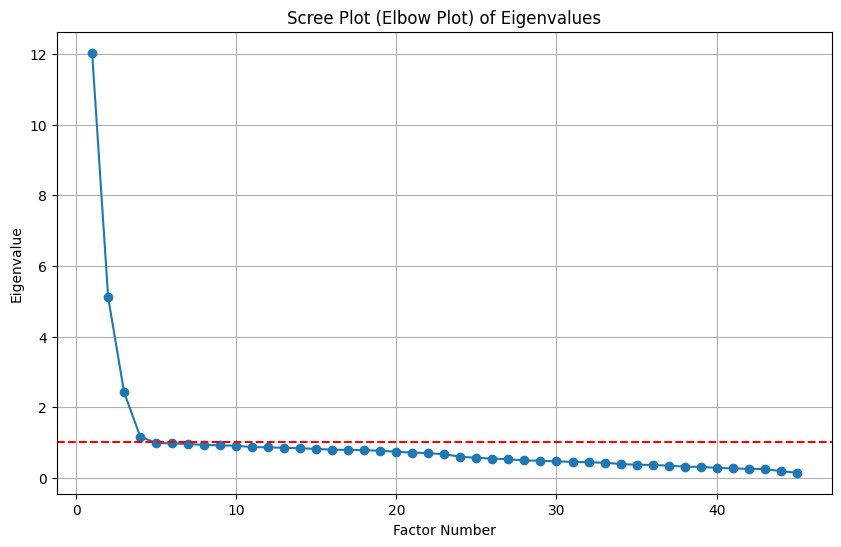

In [85]:
# Plot the eigenvalues (Scree Plot / Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, efa_data.shape[1] + 1), eigenvalues, marker='o')
plt.title('Scree Plot (Elbow Plot) of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser criterion line (eigenvalue = 1)
plt.grid()
plt.show()

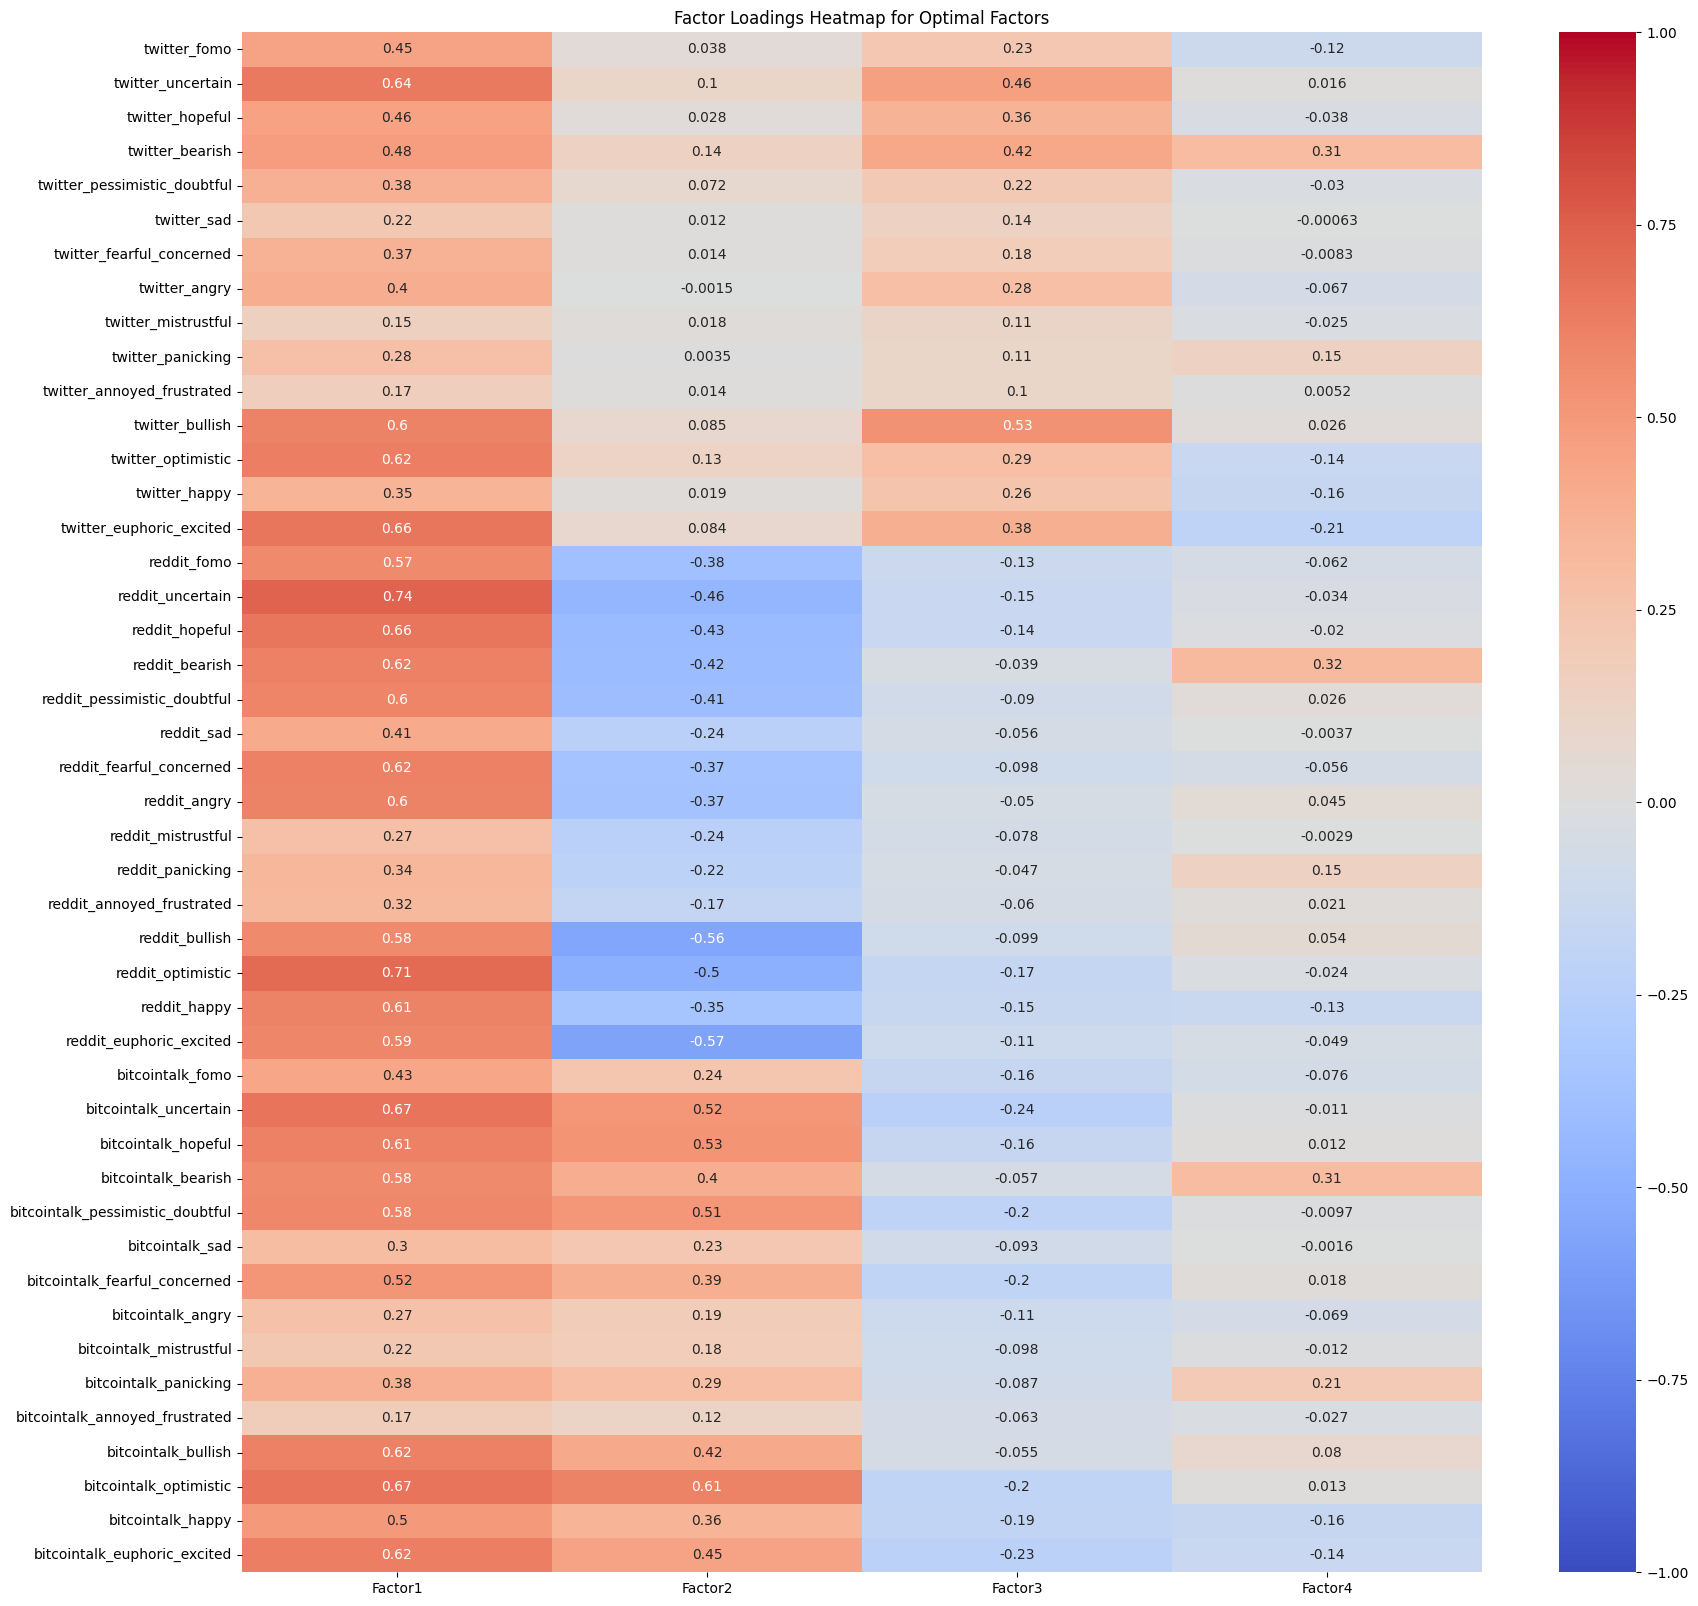

Factor1   Factor2   Factor3   Factor4
twitter_fomo                      0.446279  0.038131  0.226914 -0.124474
twitter_uncertain                 0.640979  0.102402  0.462127  0.015597
twitter_hopeful                   0.457125  0.027870  0.359395 -0.037602
twitter_bearish                   0.483333  0.139004  0.423076  0.312233
twitter_pessimistic_doubtful      0.382360  0.071855  0.215404 -0.029942
twitter_sad                       0.220303  0.012024  0.142416 -0.000627
twitter_fearful_concerned         0.374535  0.014008  0.181755 -0.008292
twitter_angry                     0.396544 -0.001454  0.284862 -0.067437
twitter_mistrustful               0.154587  0.017539  0.110109 -0.024537
twitter_panicking                 0.279690  0.003467  0.105933  0.145163
twitter_annoyed_frustrated        0.166489  0.014227  0.102057  0.005159
twitter_bullish                   0.604189  0.085291  0.534487  0.026206
twitter_optimistic                0.617475  0.125223  0.288546 -0.141847
twitter_happy                     0.352523  0.018948  0.256755 -0.159529
twitter_euphoric_excited          0.659348  0.083515  0.382901 -0.207386
reddit_fomo                       0.570640 -0.382890 -0.127402 -0.062010
reddit_uncertain                  0.740656 -0.456541 -0.147781 -0.033759
reddit_hopeful                    0.661444 -0.427410 -0.141941 -0.020461
reddit_bearish                    0.616916 -0.418066 -0.039101  0.318513
reddit_pessimistic_doubtful       0.595063 -0.410818 -0.089700  0.025829
reddit_sad                        0.407674 -0.237395 -0.055884 -0.003718
reddit_fearful_concerned          0.616660 -0.365634 -0.098183 -0.055883
reddit_angry                      0.602137 -0.374366 -0.050419  0.044553
reddit_mistrustful                0.274074 -0.235444 -0.077662 -0.002853
reddit_panicking                  0.335972 -0.222712 -0.047376  0.148220
reddit_annoyed_frustrated         0.323300 -0.172869 -0.059720  0.020979
reddit_bullish                    0.577622 -0.561684 -0.098771  0.053724
reddit_optimistic                 0.709325 -0.500344 -0.166797 -0.023921
reddit_happy                      0.608466 -0.351879 -0.149777 -0.134484
reddit_euphoric_excited           0.589738 -0.572973 -0.113996 -0.048659
bitcointalk_fomo                  0.432640  0.241641 -0.156866 -0.076063
bitcointalk_uncertain             0.670180  0.515003 -0.240709 -0.011190
bitcointalk_hopeful               0.612143  0.528508 -0.160363  0.012481
bitcointalk_bearish               0.575826  0.397502 -0.057062  0.309605
bitcointalk_pessimistic_doubtful  0.582620  0.514524 -0.204721 -0.009692
bitcointalk_sad                   0.301136  0.234162 -0.093487 -0.001625
bitcointalk_fearful_concerned     0.519677  0.390438 -0.195759  0.018387
bitcointalk_angry                 0.273203  0.187706 -0.112070 -0.069410
bitcointalk_mistrustful           0.219198  0.183664 -0.097778 -0.011595
bitcointalk_panicking             0.380589  0.286796 -0.086737  0.206118
bitcointalk_annoyed_frustrated    0.172875  0.123907 -0.063447 -0.026853
bitcointalk_bullish               0.616833  0.421792 -0.055342  0.080158
bitcointalk_optimistic            0.671484  0.607610 -0.195946  0.012743
bitcointalk_happy                 0.498219  0.356831 -0.193335 -0.157447
bitcointalk_euphoric_excited      0.618930  0.450139 -0.232417 -0.143138

In [86]:
#Computing factors without rotation
optimal_factors = 4

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation=None)
fa_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
#print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt

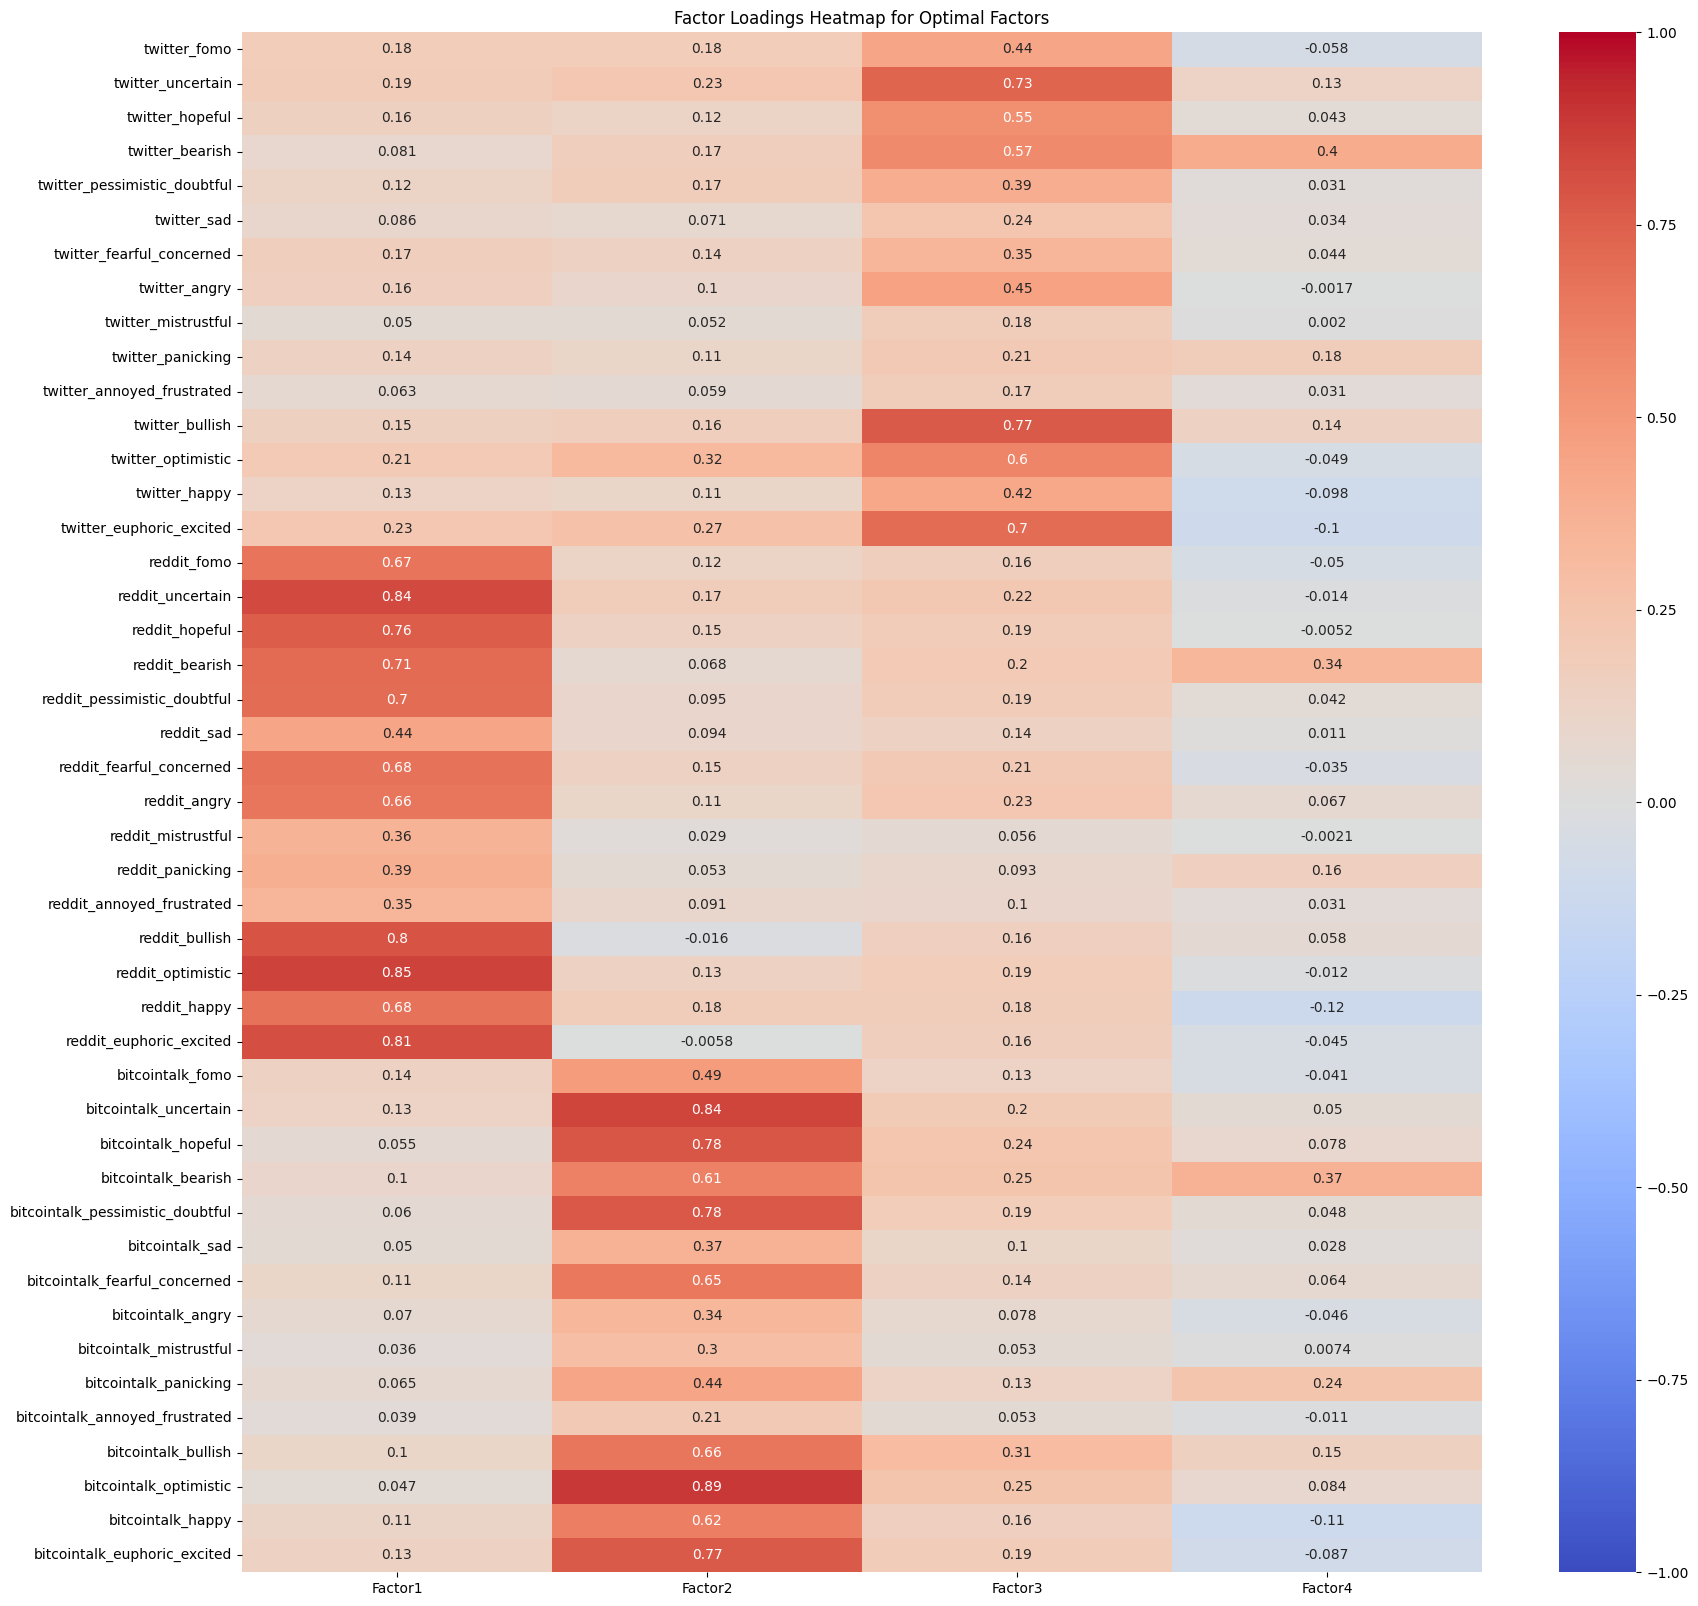

Factor1   Factor2   Factor3   Factor4
twitter_fomo                      0.180251  0.184843  0.444516 -0.057894
twitter_uncertain                 0.187622  0.229640  0.728786  0.126802
twitter_hopeful                   0.155846  0.121383  0.547231  0.042842
twitter_bearish                   0.081437  0.170125  0.574632  0.404523
twitter_pessimistic_doubtful      0.121757  0.172861  0.391151  0.030870
twitter_sad                       0.085955  0.070515  0.235397  0.034474
twitter_fearful_concerned         0.169058  0.142626  0.350254  0.044448
twitter_angry                     0.160961  0.101049  0.454776 -0.001742
twitter_mistrustful               0.050121  0.052216  0.178011  0.002033
twitter_panicking                 0.143921  0.108712  0.214287  0.179115
twitter_annoyed_frustrated        0.063118  0.059080  0.172940  0.031316
twitter_bullish                   0.154869  0.164213  0.766698  0.141088
twitter_optimistic                0.206036  0.315750  0.596516 -0.048533
twitter_happy                     0.125201  0.106322  0.423491 -0.098385
twitter_euphoric_excited          0.231713  0.271574  0.702504 -0.101887
reddit_fomo                       0.669547  0.120806  0.164182 -0.049685
reddit_uncertain                  0.835810  0.174903  0.224979 -0.013949
reddit_hopeful                    0.763794  0.146663  0.189300 -0.005154
reddit_bearish                    0.705602  0.067937  0.203999  0.337992
reddit_pessimistic_doubtful       0.695359  0.095075  0.193089  0.041692
reddit_sad                        0.442654  0.093898  0.144286  0.010642
reddit_fearful_concerned          0.677260  0.145675  0.213446 -0.035473
reddit_angry                      0.662117  0.105965  0.230412  0.067297
reddit_mistrustful                0.364140  0.028725  0.056238 -0.002136
reddit_panicking                  0.388115  0.053076  0.093450  0.156550
reddit_annoyed_frustrated         0.345303  0.090943  0.099636  0.031321
reddit_bullish                    0.795808 -0.015947  0.157723  0.057762
reddit_optimistic                 0.853556  0.134915  0.187044 -0.011597
reddit_happy                      0.676243  0.176698  0.178743 -0.118713
reddit_euphoric_excited           0.813756 -0.005816  0.164972 -0.044760
bitcointalk_fomo                  0.144761  0.486201  0.130066 -0.041188
bitcointalk_uncertain             0.125360  0.844685  0.201743  0.050272
bitcointalk_hopeful               0.055230  0.784146  0.236292  0.078371
bitcointalk_bearish               0.101502  0.614904  0.248045  0.372503
bitcointalk_pessimistic_doubtful  0.059785  0.778341  0.185659  0.048234
bitcointalk_sad                   0.049944  0.374771  0.102669  0.027729
bitcointalk_fearful_concerned     0.107007  0.651791  0.144088  0.064201
bitcointalk_angry                 0.069771  0.337899  0.077763 -0.046470
bitcointalk_mistrustful           0.035759  0.295572  0.052714  0.007417
bitcointalk_panicking             0.064915  0.444772  0.125178  0.243727
bitcointalk_annoyed_frustrated    0.038589  0.213321  0.053483 -0.011407
bitcointalk_bullish               0.103949  0.663724  0.306261  0.150823
bitcointalk_optimistic            0.046756  0.888328  0.245328  0.084498
bitcointalk_happy                 0.112738  0.622571  0.156862 -0.113178
bitcointalk_euphoric_excited      0.134000  0.772513  0.194474 -0.087484

In [87]:
#Computing factors with rotation
optimal_factors = 4

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fa_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt

## 3.8 Exploratory Factor Analysis on transformed data

In [88]:
#Exploratory factor analysis for transformed data
from factor_analyzer import calculate_kmo, FactorAnalyzer
efa_data_trans = transformed_select_data

kmo_all, kmo_model = calculate_kmo(efa_data)
print(f"KMO Model Score: {kmo_model:.3f} (must be > 0.5; should be > 0.8 for acceptable factor analysis)")

#Factor seelction based on Kaiser criterion
fat = FactorAnalyzer(n_factors=efa_data.shape[1], rotation=None)
fat.fit(efa_data)


KMO Model Score: 0.972 (must be > 0.5; should be > 0.8 for acceptable factor analysis)


FactorAnalyzer(n_factors=45, rotation=None, rotation_kwargs={})

### 3.8.1 Factor selection based on eigenvalues
Keep factors with eigenvalues larger 1...

In [89]:
# Get eigenvalues
eigenvalues, _ = fat.get_eigenvalues()

eigenvalues

array([12.03654796,  5.10956384,  2.41487837,  1.166276  ,  0.98362016,
        0.9731821 ,  0.95431096,  0.92972199,  0.91912834,  0.90551387,
        0.86839116,  0.86133877,  0.84768611,  0.83256404,  0.81913569,
        0.79379857,  0.78843182,  0.77994922,  0.76584866,  0.73753944,
        0.71310275,  0.69730337,  0.66314238,  0.59755138,  0.56304423,
        0.54338955,  0.5229095 ,  0.48952712,  0.48304465,  0.46157373,
        0.45202462,  0.43730314,  0.42771098,  0.38863294,  0.36758204,
        0.36259683,  0.34227983,  0.31542828,  0.30834727,  0.28141196,
        0.26273585,  0.25354687,  0.24647364,  0.1894518 ,  0.14245822])

-**First 4 factors should be selected according to Kaiser criterion.**

### 3.8.2 Factor selection based on cumulative variance
-60% of explained cumulative variance is sufficient

In [90]:
#Factor selection based on cumulative variance explained
variance_explained_fa_solution1 = fat.get_factor_variance()
print("\nVariance explained by different factor solution:")
print("Variance explained by each factor:\n", variance_explained_fa_solution1[1])
print("Cumulative variance explained:\n", variance_explained_fa_solution1[2])


Variance explained by different factor solution:
Variance explained by each factor:
 [2.59273767e-01 1.06391642e-01 4.43241706e-02 1.52600211e-02
 8.40562350e-03 6.44965024e-03 5.92568898e-03 4.46406962e-03
 3.86234596e-03 3.65821899e-03 3.52185553e-03 3.03890743e-03
 2.97670017e-03 2.47140794e-03 2.25286966e-03 2.13493388e-03
 1.92375078e-03 1.77329841e-03 1.65180805e-03 1.51398854e-03
 1.35451048e-03 1.31168722e-03 1.20370935e-03 1.15199619e-03
 1.08682463e-03 9.64669378e-04 9.16541019e-04 8.57782260e-04
 7.86642480e-04 7.58060193e-04 7.23810205e-04 6.20568580e-04
 6.02293962e-04 5.72236231e-04 4.90224977e-04 4.02599155e-04
 3.54407744e-04 3.43302832e-04 2.42856046e-04 2.15003823e-04
 1.55519631e-04 1.01734726e-04 4.91491107e-05 1.01114391e-05
 0.00000000e+00]
Cumulative variance explained:
 [0.25927377 0.36566541 0.40998958 0.4252496  0.43365522 0.44010487
 0.44603056 0.45049463 0.45435698 0.4580152  0.46153705 0.46457596
 0.46755266 0.47002407 0.47227694 0.47441187 0.47633562 0.47

-**Keep first 29 factors to achieve 60% explained variance**

### 3.8.3 Factor selection based on Scree plot

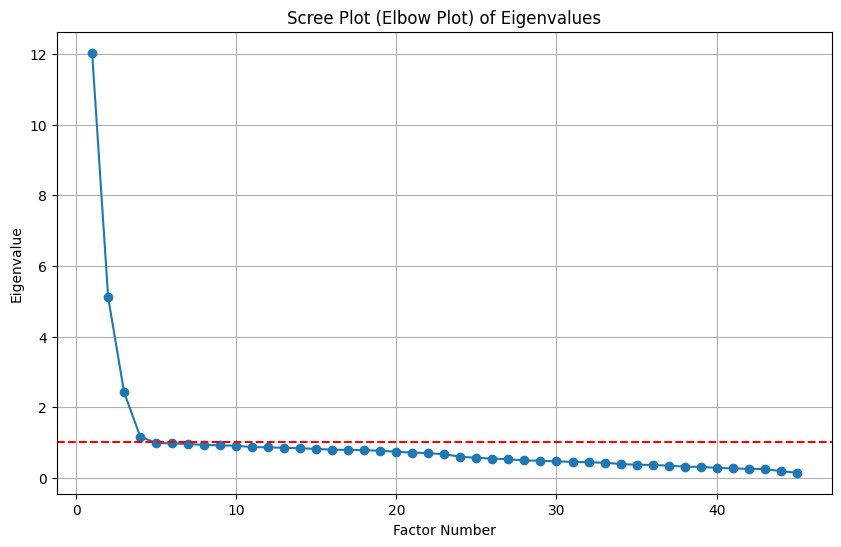

In [91]:
# Plot the eigenvalues (Scree Plot / Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, efa_data.shape[1] + 1), eigenvalues, marker='o')
plt.title('Scree Plot (Elbow Plot) of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser criterion line (eigenvalue = 1)
plt.grid()
plt.show()

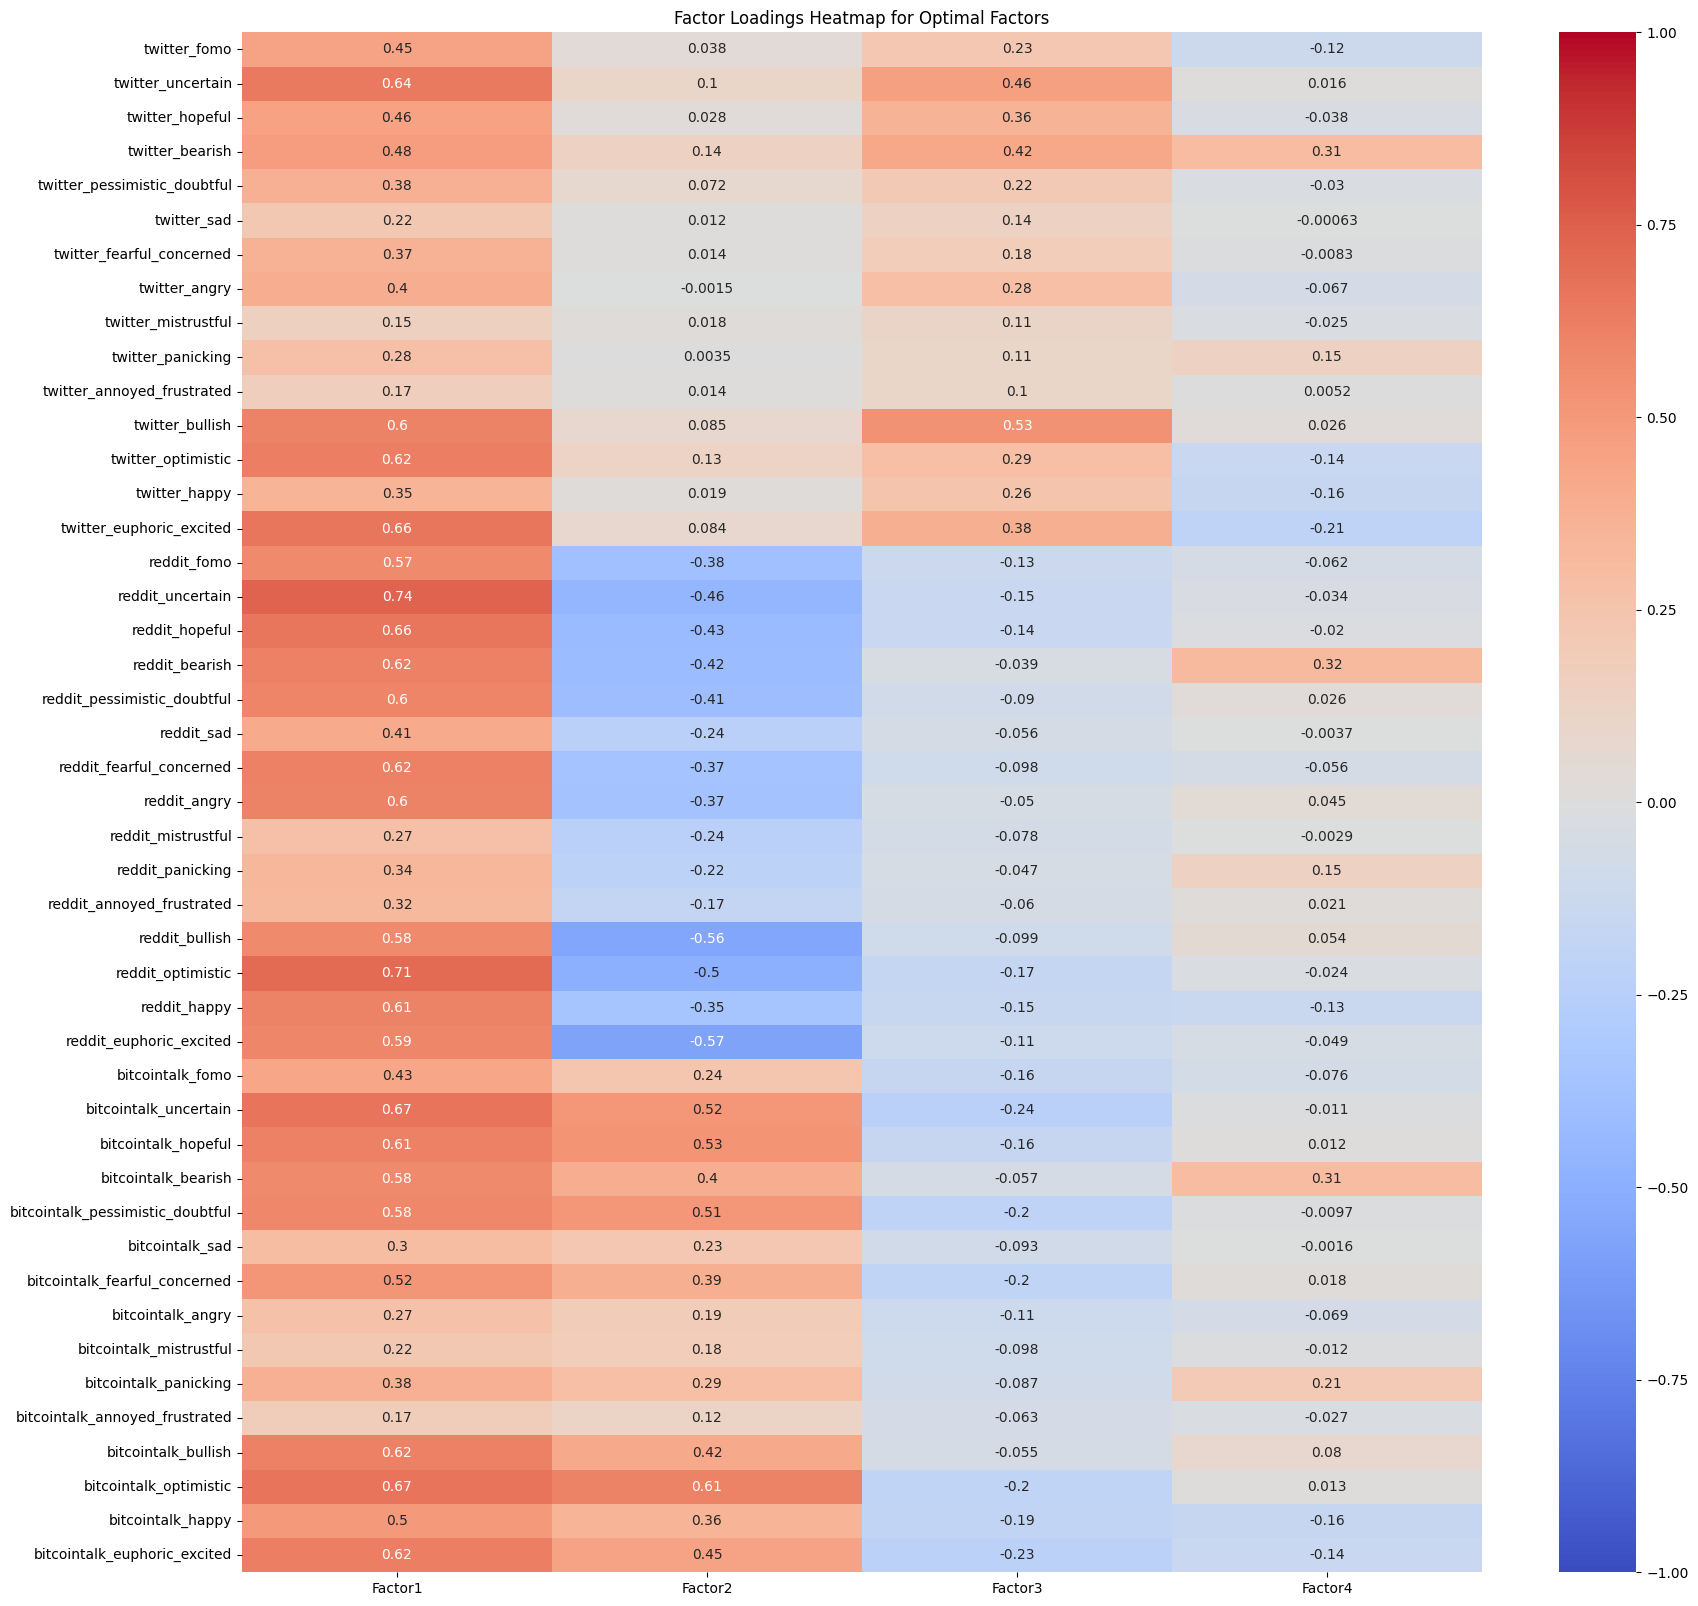

Factor1   Factor2   Factor3   Factor4
twitter_fomo                      0.446279  0.038131  0.226914 -0.124474
twitter_uncertain                 0.640979  0.102402  0.462127  0.015597
twitter_hopeful                   0.457125  0.027870  0.359395 -0.037602
twitter_bearish                   0.483333  0.139004  0.423076  0.312233
twitter_pessimistic_doubtful      0.382360  0.071855  0.215404 -0.029942
twitter_sad                       0.220303  0.012024  0.142416 -0.000627
twitter_fearful_concerned         0.374535  0.014008  0.181755 -0.008292
twitter_angry                     0.396544 -0.001454  0.284862 -0.067437
twitter_mistrustful               0.154587  0.017539  0.110109 -0.024537
twitter_panicking                 0.279690  0.003467  0.105933  0.145163
twitter_annoyed_frustrated        0.166489  0.014227  0.102057  0.005159
twitter_bullish                   0.604189  0.085291  0.534487  0.026206
twitter_optimistic                0.617475  0.125223  0.288546 -0.141847
twitter_happy                     0.352523  0.018948  0.256755 -0.159529
twitter_euphoric_excited          0.659348  0.083515  0.382901 -0.207386
reddit_fomo                       0.570640 -0.382890 -0.127402 -0.062010
reddit_uncertain                  0.740656 -0.456541 -0.147781 -0.033759
reddit_hopeful                    0.661444 -0.427410 -0.141941 -0.020461
reddit_bearish                    0.616916 -0.418066 -0.039101  0.318513
reddit_pessimistic_doubtful       0.595063 -0.410818 -0.089700  0.025829
reddit_sad                        0.407674 -0.237395 -0.055884 -0.003718
reddit_fearful_concerned          0.616660 -0.365634 -0.098183 -0.055883
reddit_angry                      0.602137 -0.374366 -0.050419  0.044553
reddit_mistrustful                0.274074 -0.235444 -0.077662 -0.002853
reddit_panicking                  0.335972 -0.222712 -0.047376  0.148220
reddit_annoyed_frustrated         0.323300 -0.172869 -0.059720  0.020979
reddit_bullish                    0.577622 -0.561684 -0.098771  0.053724
reddit_optimistic                 0.709325 -0.500344 -0.166797 -0.023921
reddit_happy                      0.608466 -0.351879 -0.149777 -0.134484
reddit_euphoric_excited           0.589738 -0.572973 -0.113996 -0.048659
bitcointalk_fomo                  0.432640  0.241641 -0.156866 -0.076063
bitcointalk_uncertain             0.670180  0.515003 -0.240709 -0.011190
bitcointalk_hopeful               0.612143  0.528508 -0.160363  0.012481
bitcointalk_bearish               0.575826  0.397502 -0.057062  0.309605
bitcointalk_pessimistic_doubtful  0.582620  0.514524 -0.204721 -0.009692
bitcointalk_sad                   0.301136  0.234162 -0.093487 -0.001625
bitcointalk_fearful_concerned     0.519677  0.390438 -0.195759  0.018387
bitcointalk_angry                 0.273203  0.187706 -0.112070 -0.069410
bitcointalk_mistrustful           0.219198  0.183664 -0.097778 -0.011595
bitcointalk_panicking             0.380589  0.286796 -0.086737  0.206118
bitcointalk_annoyed_frustrated    0.172875  0.123907 -0.063447 -0.026853
bitcointalk_bullish               0.616833  0.421792 -0.055342  0.080158
bitcointalk_optimistic            0.671484  0.607610 -0.195946  0.012743
bitcointalk_happy                 0.498219  0.356831 -0.193335 -0.157447
bitcointalk_euphoric_excited      0.618930  0.450139 -0.232417 -0.143138

In [92]:
#Computing factors without rotation
optimal_factors = 4

# Perform EFA with the optimal number of factors
fat_opt = FactorAnalyzer(n_factors=optimal_factors, rotation=None)
fat_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fat_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
#print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt

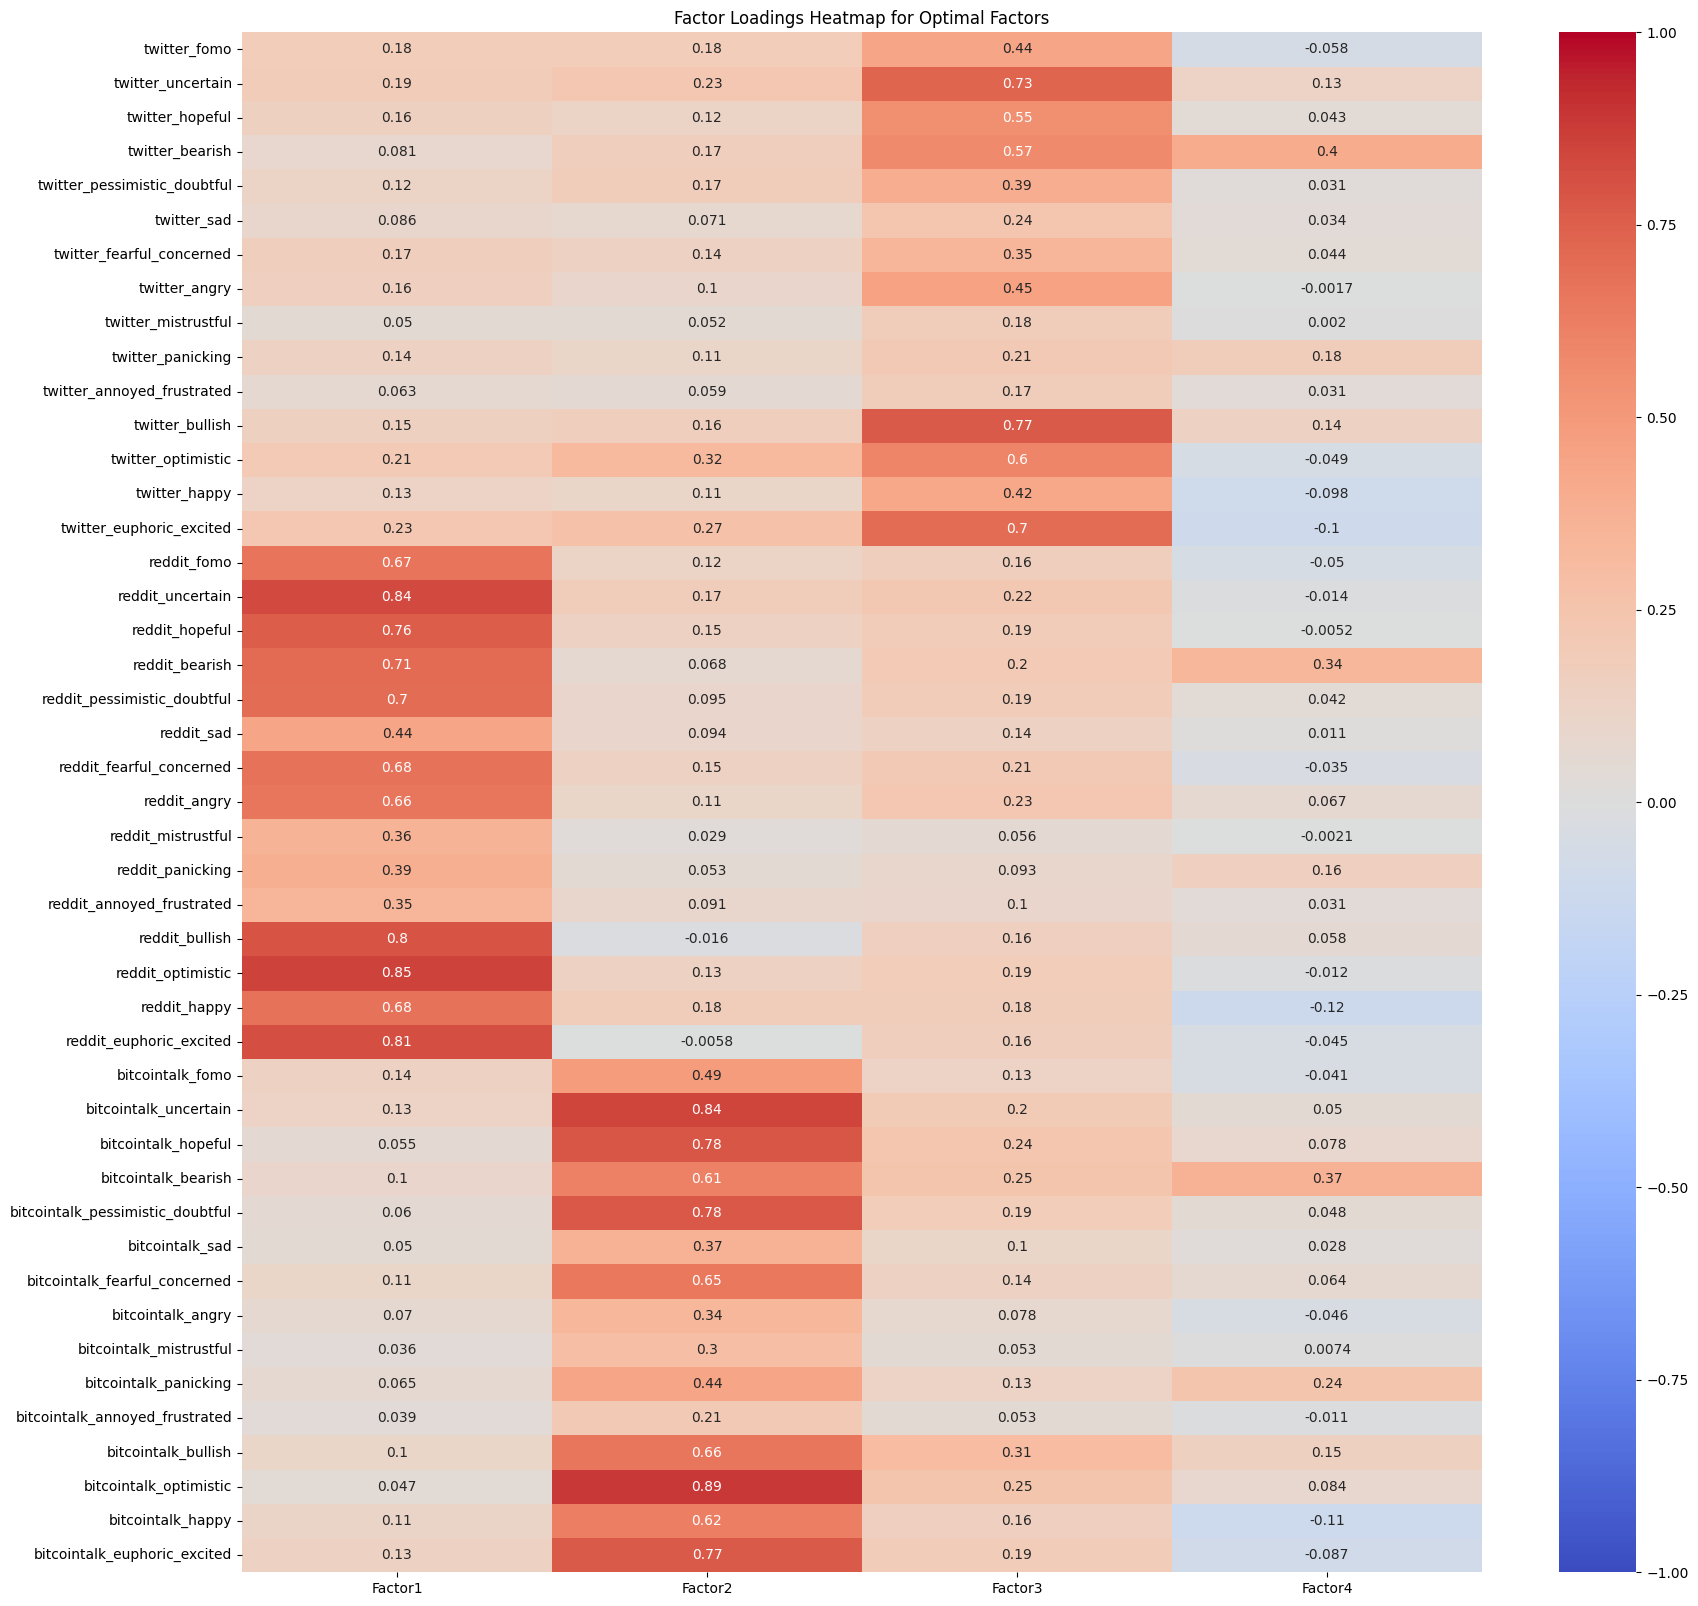

Factor1   Factor2   Factor3   Factor4
twitter_fomo                      0.180251  0.184843  0.444516 -0.057894
twitter_uncertain                 0.187622  0.229640  0.728786  0.126802
twitter_hopeful                   0.155846  0.121383  0.547231  0.042842
twitter_bearish                   0.081437  0.170125  0.574632  0.404523
twitter_pessimistic_doubtful      0.121757  0.172861  0.391151  0.030870
twitter_sad                       0.085955  0.070515  0.235397  0.034474
twitter_fearful_concerned         0.169058  0.142626  0.350254  0.044448
twitter_angry                     0.160961  0.101049  0.454776 -0.001742
twitter_mistrustful               0.050121  0.052216  0.178011  0.002033
twitter_panicking                 0.143921  0.108712  0.214287  0.179115
twitter_annoyed_frustrated        0.063118  0.059080  0.172940  0.031316
twitter_bullish                   0.154869  0.164213  0.766698  0.141088
twitter_optimistic                0.206036  0.315750  0.596516 -0.048533
twitter_happy                     0.125201  0.106322  0.423491 -0.098385
twitter_euphoric_excited          0.231713  0.271574  0.702504 -0.101887
reddit_fomo                       0.669547  0.120806  0.164182 -0.049685
reddit_uncertain                  0.835810  0.174903  0.224979 -0.013949
reddit_hopeful                    0.763794  0.146663  0.189300 -0.005154
reddit_bearish                    0.705602  0.067937  0.203999  0.337992
reddit_pessimistic_doubtful       0.695359  0.095075  0.193089  0.041692
reddit_sad                        0.442654  0.093898  0.144286  0.010642
reddit_fearful_concerned          0.677260  0.145675  0.213446 -0.035473
reddit_angry                      0.662117  0.105965  0.230412  0.067297
reddit_mistrustful                0.364140  0.028725  0.056238 -0.002136
reddit_panicking                  0.388115  0.053076  0.093450  0.156550
reddit_annoyed_frustrated         0.345303  0.090943  0.099636  0.031321
reddit_bullish                    0.795808 -0.015947  0.157723  0.057762
reddit_optimistic                 0.853556  0.134915  0.187044 -0.011597
reddit_happy                      0.676243  0.176698  0.178743 -0.118713
reddit_euphoric_excited           0.813756 -0.005816  0.164972 -0.044760
bitcointalk_fomo                  0.144761  0.486201  0.130066 -0.041188
bitcointalk_uncertain             0.125360  0.844685  0.201743  0.050272
bitcointalk_hopeful               0.055230  0.784146  0.236292  0.078371
bitcointalk_bearish               0.101502  0.614904  0.248045  0.372503
bitcointalk_pessimistic_doubtful  0.059785  0.778341  0.185659  0.048234
bitcointalk_sad                   0.049944  0.374771  0.102669  0.027729
bitcointalk_fearful_concerned     0.107007  0.651791  0.144088  0.064201
bitcointalk_angry                 0.069771  0.337899  0.077763 -0.046470
bitcointalk_mistrustful           0.035759  0.295572  0.052714  0.007417
bitcointalk_panicking             0.064915  0.444772  0.125178  0.243727
bitcointalk_annoyed_frustrated    0.038589  0.213321  0.053483 -0.011407
bitcointalk_bullish               0.103949  0.663724  0.306261  0.150823
bitcointalk_optimistic            0.046756  0.888328  0.245328  0.084498
bitcointalk_happy                 0.112738  0.622571  0.156862 -0.113178
bitcointalk_euphoric_excited      0.134000  0.772513  0.194474 -0.087484

In [93]:
#Computing factors with rotation
optimal_factors = 4

# Perform EFA with the optimal number of factors
fat_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fat_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fat_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt

# Summary

- Sentiments across different forums does not correlate, sentiments seems to be forum specific and correlate with other sentiments in forum.
- If opposing features correlate with each other,like reddit_optimistic with reddit_uncertain, it means that in times of market volatility a lot of different sentiments appear, as more people post their sentiments, leading to a spike in all sentiments in these periods. As sentiment analysis is often based on frequency count of words in texts, this would make sense as augmento likely works like that, but this dilutes the relation between the sentiments and makes sentiment based ML very hard for price prediction imo...solution could be to perform feature engineering that accounts for general increase in sentiments (for example aggregatig all sentiments and computing the share of each sentiment on the total aggregated sentiment).
- Some features (bitcointalk_annoyed_frustrated, twitter_annoyed_frustrated) seem to have no correlation with other features, may be valuable for ML
- Factor analysis makes sense to reduce dimensionality of dataset.

## 4 EDA on engineered set
Transformed all sentiment features to be relative to aggregated forum sentiment
Every feature is now converted to be the representation of its realtive share to the aggregated sentiment of all features of the respective platform.

Example 'twitter_total' = 'twitter_bearish' + 'twitter_bullish' + 'twitter_panicking' + ...

NEW feature: 
'twitter_bearish_new' = 'twitter_bearish_old'/'twitter_total'

In [128]:
#Feature engineering test
engineered_data = select_data.copy()

engineered_data['twitter_total'] = engineered_data[twitter_columns].sum(axis=1)
engineered_data[twitter_columns] = engineered_data[twitter_columns].div(engineered_data['twitter_total'], axis=0)
engineered_data['reddit_total'] = engineered_data[reddit_columns].sum(axis=1)
engineered_data[reddit_columns] = engineered_data[reddit_columns].div(engineered_data['reddit_total'], axis=0)
engineered_data['bitcointalk_total'] = engineered_data[bitcointalk_columns].sum(axis=1)
engineered_data[bitcointalk_columns] = engineered_data[bitcointalk_columns].div(engineered_data['bitcointalk_total'], axis=0)
engineered_data.drop(['twitter_total', 'reddit_total', 'bitcointalk_total'], axis=1, inplace=True)
engineered_data.dropna(inplace=True)

engineered_data = pd.DataFrame(scaler.fit_transform(engineered_data), columns=engineered_data.columns)

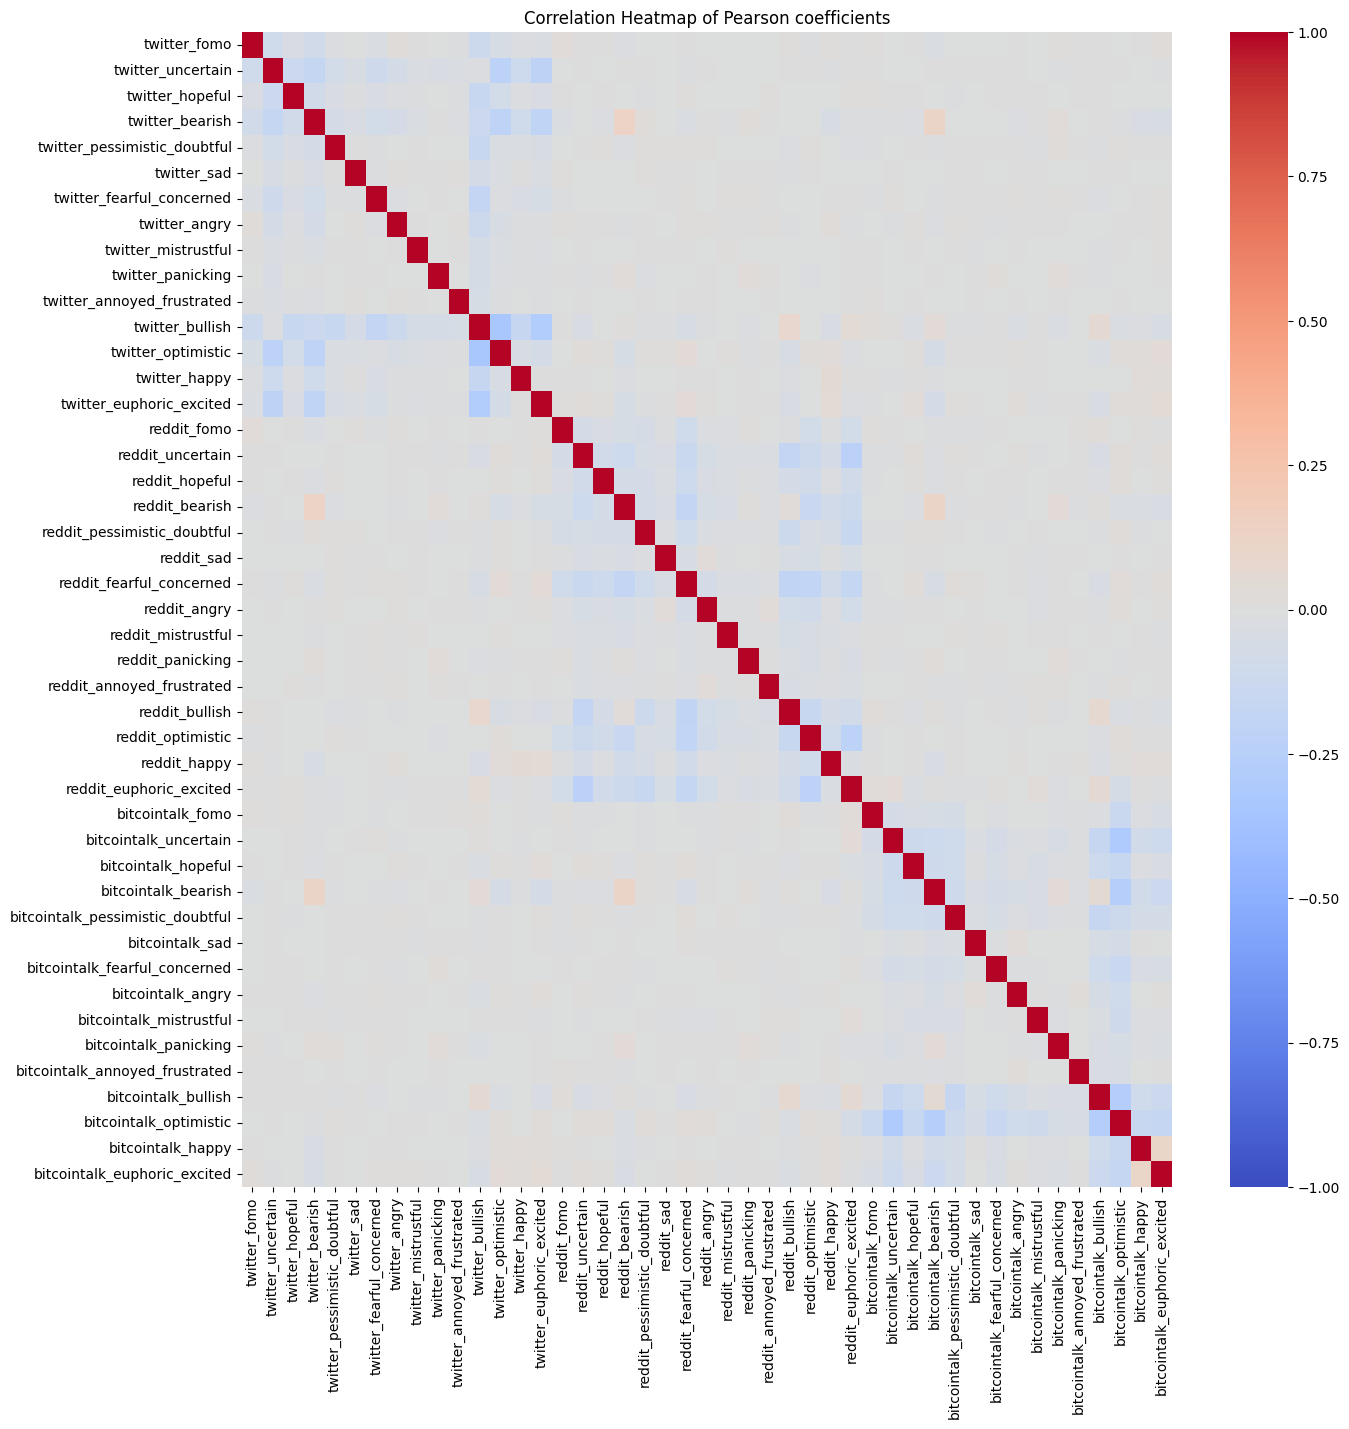

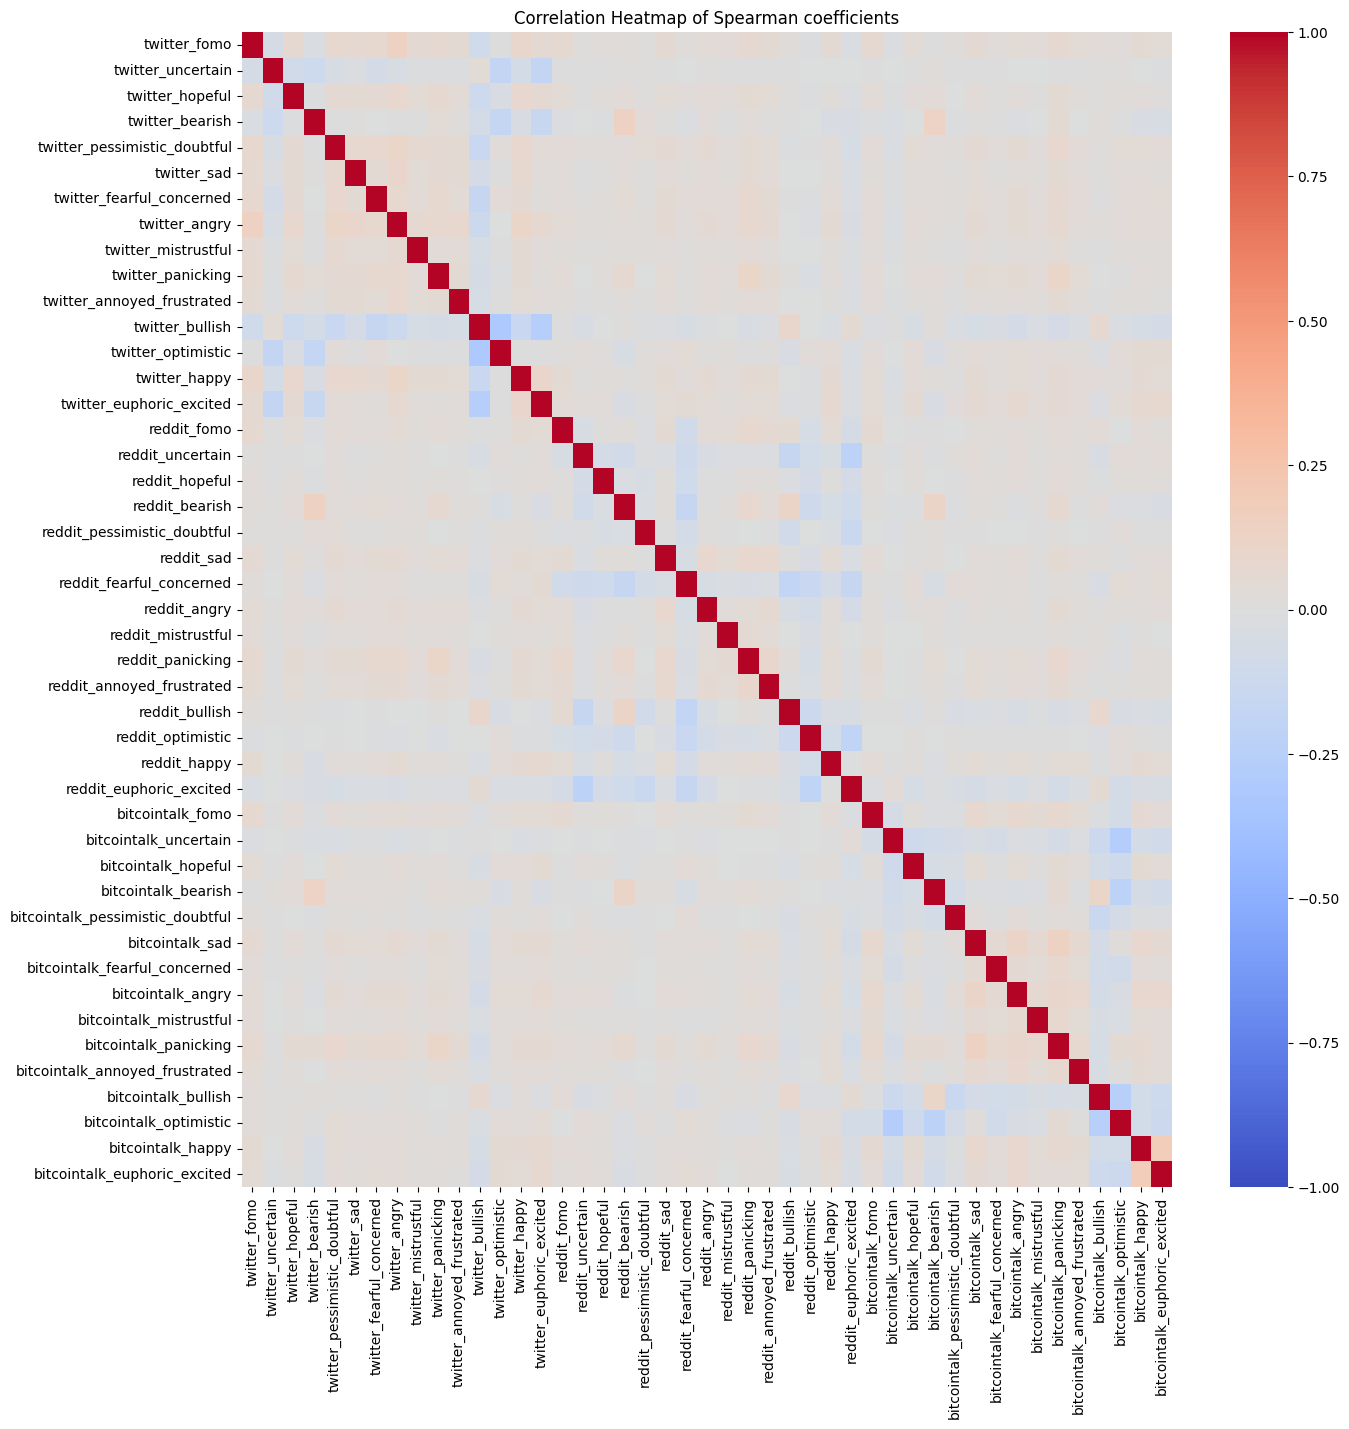

In [129]:
#Compute pearson correlation matrix 
pearson_corr = engineered_data.corr(method='pearson')

#Compute spearman correlation matrix 
spearman_corr = engineered_data.corr(method='spearman')

#Make heatmaps for better visualization 
plt.figure(figsize=(15, 15))
sns.heatmap(pearson_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pearson coefficients')
plt.show()

plt.figure(figsize=(15, 15))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Spearman coefficients')
plt.show()

## 4.1 k-means clustering

/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kme

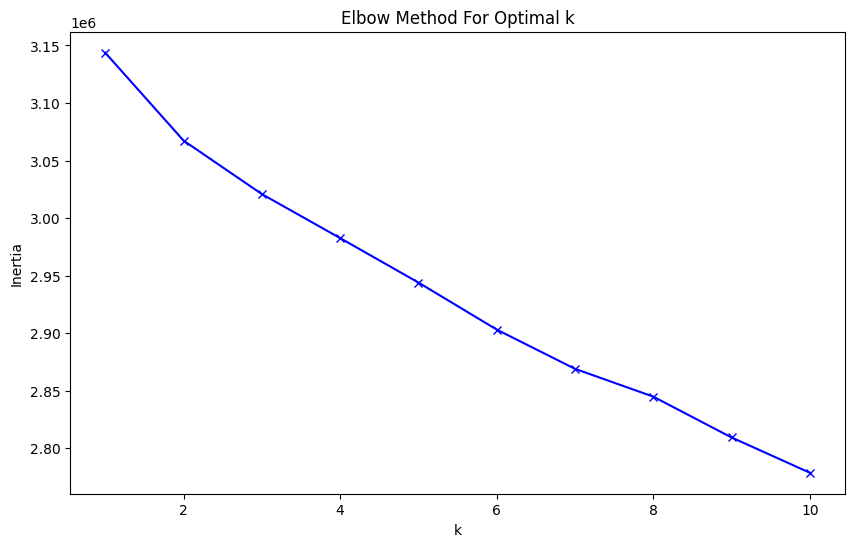

In [130]:
# Implement elbow method to find optimal k
inertia = []
k_range = range(1, 11)  # Test k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engineered_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


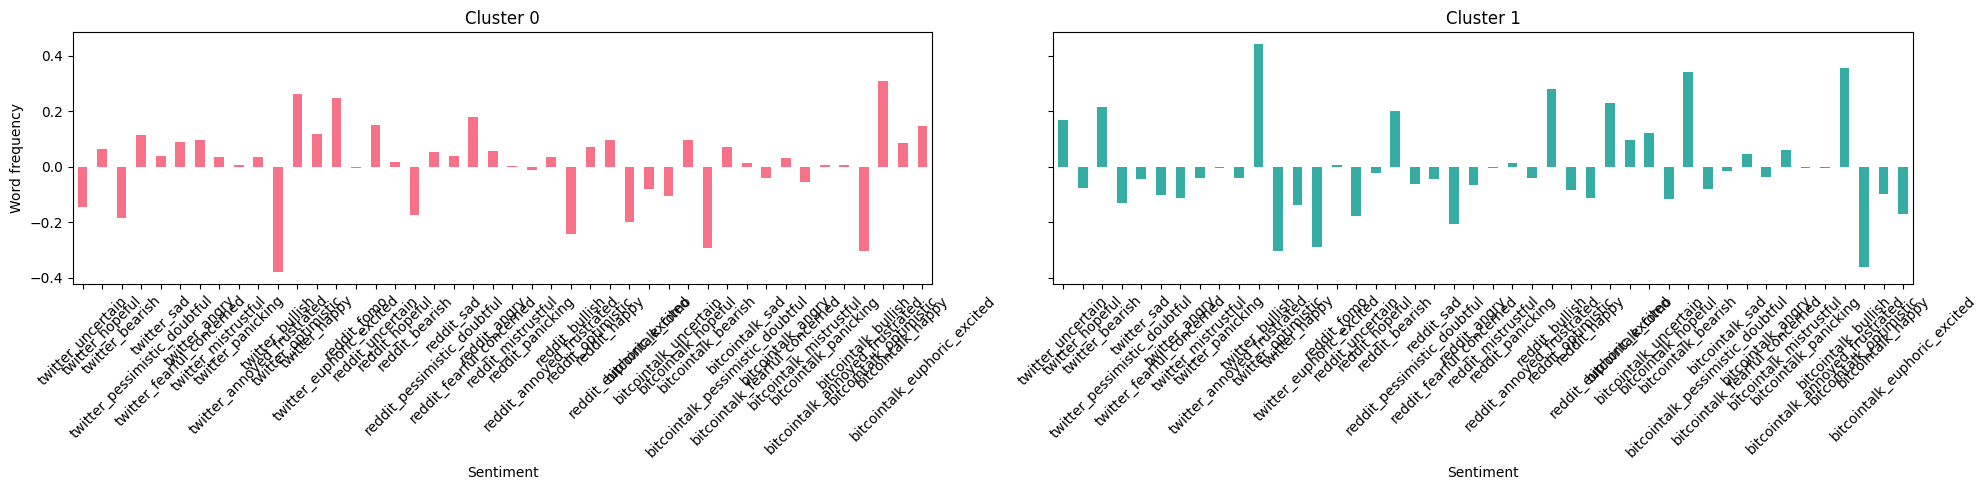

In [131]:
#K means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
engineered_data['cluster_kmeans'] = kmeans.fit_predict(engineered_data)

# INSTRUCTION: group the observation by clusters and compute the mean of all variables except the user ID.
grouped_df = engineered_data.iloc[:,1:].groupby('cluster_kmeans').mean()

# Set up the figure and axis for subplots
num_clusters = k
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5), sharey=True)

# Define colors for the bars
colors = sns.color_palette('husl', num_clusters)

# Plot each cluster's data in its subplot
for i in range(num_clusters):
    ax = axes[i]
    cluster_data = grouped_df.iloc[i,:] 
    cluster_data.plot(kind='bar', ax=ax, color=colors[i], legend=False)
    
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Word frequency')
    ax.set_xticklabels(cluster_data.index, rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

grouped_df

engineered_data.drop(columns=['cluster_kmeans'], inplace=True)

## 4.2 Exploratory Factor Analysis on engineered data

In [132]:
#Exploratory factor analysis on engineered data
from factor_analyzer import calculate_kmo, FactorAnalyzer
efa_data = engineered_data

kmo_all, kmo_model = calculate_kmo(efa_data)
print(f"KMO Model Score: {kmo_model:.3f} (must be > 0.5; should be > 0.8 for acceptable factor analysis)")

#Factor seelction based on Kaiser criterion
fa = FactorAnalyzer(n_factors=efa_data.shape[1], rotation=None)
fa.fit(efa_data)

/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO Model Score: 0.523 (must be > 0.5; should be > 0.8 for acceptable factor analysis)


FactorAnalyzer(n_factors=45, rotation=None, rotation_kwargs={})

**Lower KMO criterion indicates less colinearity...good**

### 4.4.1 Factor selection based on eigenvalues

In [133]:
# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

eigenvalues

array([ 1.81993332e+00,  1.46641972e+00,  1.40191552e+00,  1.30845228e+00,
        1.23117163e+00,  1.21395218e+00,  1.20247084e+00,  1.14195752e+00,
        1.12516970e+00,  1.12119488e+00,  1.09964735e+00,  1.09297817e+00,
        1.08121527e+00,  1.07005134e+00,  1.06062466e+00,  1.05611797e+00,
        1.04582878e+00,  1.04139184e+00,  1.03763670e+00,  1.02716052e+00,
        1.02548178e+00,  1.02161603e+00,  1.01380100e+00,  1.00991051e+00,
        1.00502336e+00,  1.00020911e+00,  9.96705847e-01,  9.92730392e-01,
        9.90880595e-01,  9.84184685e-01,  9.81009193e-01,  9.79211070e-01,
        9.71214792e-01,  9.70086646e-01,  9.65079601e-01,  9.62190260e-01,
        9.51641063e-01,  9.50890187e-01,  9.31447802e-01,  8.99772284e-01,
        8.86465201e-01,  8.65158388e-01,  4.98947504e-16,  1.60771952e-16,
       -7.00678972e-16])

Eigenvalues indicates 26 factors to be sufficient

### 4.4.2 Factor selection based on cumulative variance
-60% of explained cumulative variance is sufficient

In [134]:
#Factor selection based on cumulative variance explained
variance_explained_fa_solution1 = fa.get_factor_variance()
print("\nVariance explained by different factor solution:")
print("Variance explained by each factor:\n", variance_explained_fa_solution1[1])
print("Cumulative variance explained:\n", variance_explained_fa_solution1[2])


Variance explained by different factor solution:
Variance explained by each factor:
 [0.04033185 0.03247599 0.03104257 0.02896561 0.02724826 0.0268656
 0.02661046 0.02526572 0.02489266 0.02480433 0.0243255  0.02417729
 0.02391589 0.02366781 0.02345833 0.02335818 0.02312953 0.02303093
 0.02294748 0.02271468 0.02267737 0.02259147 0.0224178  0.02233134
 0.02222274 0.02211576 0.02203791 0.02194956 0.02190846 0.02175966
 0.02168909 0.02164913 0.02147144 0.02144637 0.0213351  0.02127089
 0.02103647 0.02101978 0.02058773 0.01988383 0.01958812 0.01911463
 0.         0.         0.        ]
Cumulative variance explained:
 [0.04033185 0.07280785 0.10385041 0.13281602 0.16006428 0.18692988
 0.21354034 0.23880607 0.26369873 0.28850306 0.31282855 0.33700585
 0.36092174 0.38458955 0.40804788 0.43140605 0.45453558 0.47756651
 0.50051399 0.52322867 0.54590604 0.56849751 0.59091531 0.61324666
 0.6354694  0.65758516 0.67962306 0.70157263 0.72348109 0.74524074
 0.76692984 0.78857897 0.81005041 0.83149678

Cumulative variance indicates 24 factors to be sufficient

### 4.4.3 Factor selection based on Scree plot

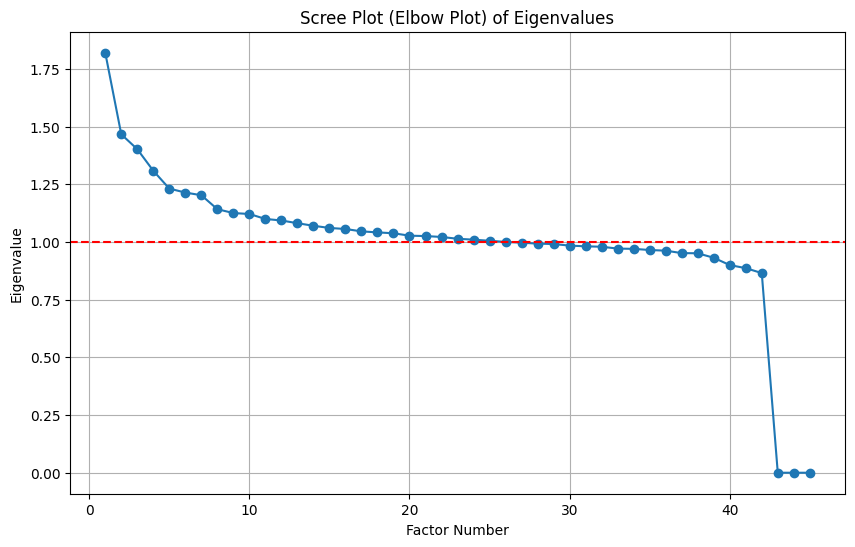

In [135]:
# Plot the eigenvalues (Scree Plot / Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, efa_data.shape[1] + 1), eigenvalues, marker='o')
plt.title('Scree Plot (Elbow Plot) of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser criterion line (eigenvalue = 1)
plt.grid()
plt.show()

### 4.4.4 Factor loading without rotation

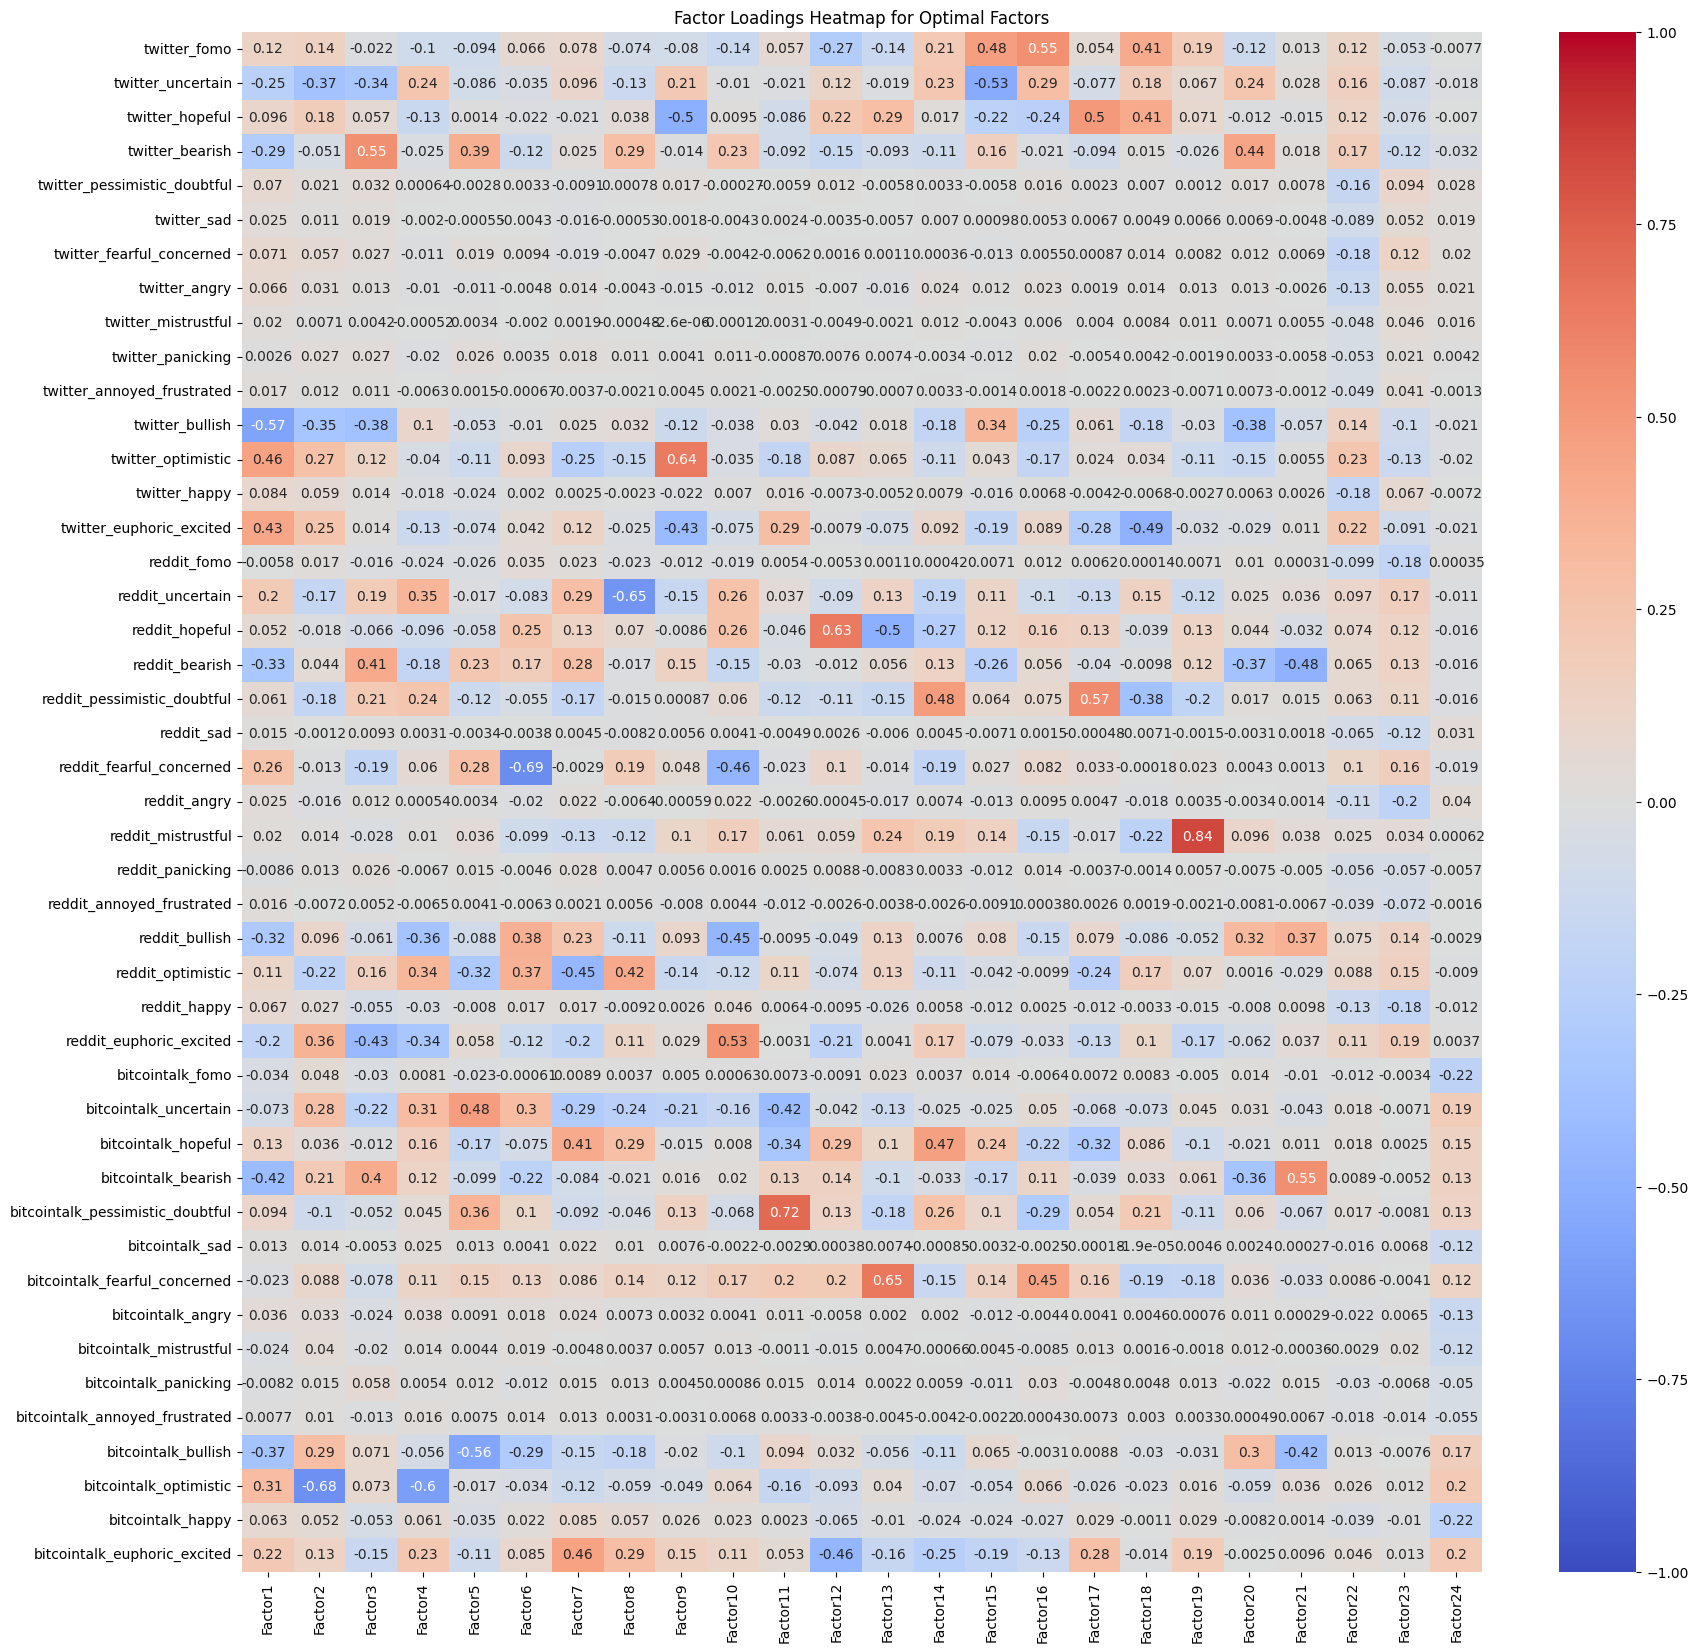

Factor1   Factor2   Factor3   Factor4  \
twitter_fomo                      0.120434  0.136057 -0.021592 -0.100726   
twitter_uncertain                -0.249999 -0.372242 -0.340605  0.237659   
twitter_hopeful                   0.096071  0.178635  0.056964 -0.134672   
twitter_bearish                  -0.287793 -0.050978  0.548817 -0.025347   
twitter_pessimistic_doubtful      0.070262  0.020833  0.032476  0.000644   
twitter_sad                       0.024867  0.010674  0.019020 -0.001958   
twitter_fearful_concerned         0.071035  0.056528  0.026698 -0.011424   
twitter_angry                     0.065784  0.031208  0.013484 -0.010315   
twitter_mistrustful               0.020030  0.007141  0.004173 -0.000524   
twitter_panicking                 0.002550  0.027398  0.026988 -0.020214   
twitter_annoyed_frustrated        0.016639  0.012300  0.011306 -0.006274   
twitter_bullish                  -0.565678 -0.350212 -0.376936  0.101274   
twitter_optimistic                0.457869  0.270223  0.122342 -0.039775   
twitter_happy                     0.084480  0.058911  0.013680 -0.017651   
twitter_euphoric_excited          0.432380  0.252757  0.013738 -0.127493   
reddit_fomo                      -0.005794  0.016664 -0.016418 -0.024210   
reddit_uncertain                  0.197440 -0.167591  0.192343  0.348346   
reddit_hopeful                    0.051590 -0.018291 -0.066035 -0.096409   
reddit_bearish                   -0.326099  0.043863  0.413191 -0.178266   
reddit_pessimistic_doubtful       0.060586 -0.176074  0.209097  0.240374   
reddit_sad                        0.015328 -0.001234  0.009325  0.003082   
reddit_fearful_concerned          0.259089 -0.013109 -0.191644  0.060111   
reddit_angry                      0.025401 -0.016390  0.012274  0.000536   
reddit_mistrustful                0.020332  0.013796 -0.028385  0.010182   
reddit_panicking                 -0.008619  0.013394  0.026366 -0.006685   
reddit_annoyed_frustrated         0.015635 -0.007177  0.005226 -0.006547   
reddit_bullish                   -0.315848  0.096258 -0.060626 -0.361694   
reddit_optimistic                 0.106214 -0.220495  0.163459  0.343574   
reddit_happy                      0.067387  0.026544 -0.055183 -0.030487   
reddit_euphoric_excited          -0.201378  0.359548 -0.430028 -0.339173   
bitcointalk_fomo                 -0.033541  0.047642 -0.029685  0.008126   
bitcointalk_uncertain            -0.073318  0.280656 -0.219114  0.311726   
bitcointalk_hopeful               0.130314  0.035758 -0.012218  0.162289   
bitcointalk_bearish              -0.416869  0.206891  0.401390  0.122844   
bitcointalk_pessimistic_doubtful  0.094269 -0.102629 -0.051910  0.045496   
bitcointalk_sad                   0.013196  0.013676 -0.005340  0.025203   
bitcointalk_fearful_concerned    -0.022874  0.088327 -0.078242  0.112467   
bitcointalk_angry                 0.036355  0.033037 -0.024189  0.038479   
bitcointalk_mistrustful          -0.023573  0.039966 -0.019979  0.013660   
bitcointalk_panicking            -0.008240  0.015215  0.058476  0.005371   
bitcointalk_annoyed_frustrated    0.007734  0.010291 -0.013294  0.016066   
bitcointalk_bullish              -0.366354  0.294110  0.070569 -0.055865   
bitcointalk_optimistic            0.306257 -0.677143  0.072917 -0.595728   
bitcointalk_happy                 0.063372  0.051642 -0.053075  0.060882   
bitcointalk_euphoric_excited      0.216487  0.132319 -0.145239  0.229355   

                                   Factor5   Factor6   Factor7   Factor8  \
twitter_fomo                     -0.093820  0.065568  0.078178 -0.073901   
twitter_uncertain                -0.085742 -0.035171  0.096466 -0.130571   
twitter_hopeful                   0.001369 -0.021608 -0.021001  0.038223   
twitter_bearish                   0.390026 -0.119787  0.025269  0.288540   
twitter_pessimistic_doubtful     -0.002824  0.003323 -0.009093  0.000783   
twitter_sad                      -0.000546 -0.004323 -0.016278 -0.000527   
twitte

In [136]:
#Computing factors without rotation
optimal_factors = 24

# Perform EFA with the optimal number of factors
fat_opt = FactorAnalyzer(n_factors=optimal_factors, rotation=None)
fat_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fat_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
#print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt

### 4.4.5 Factor analysis with rotation

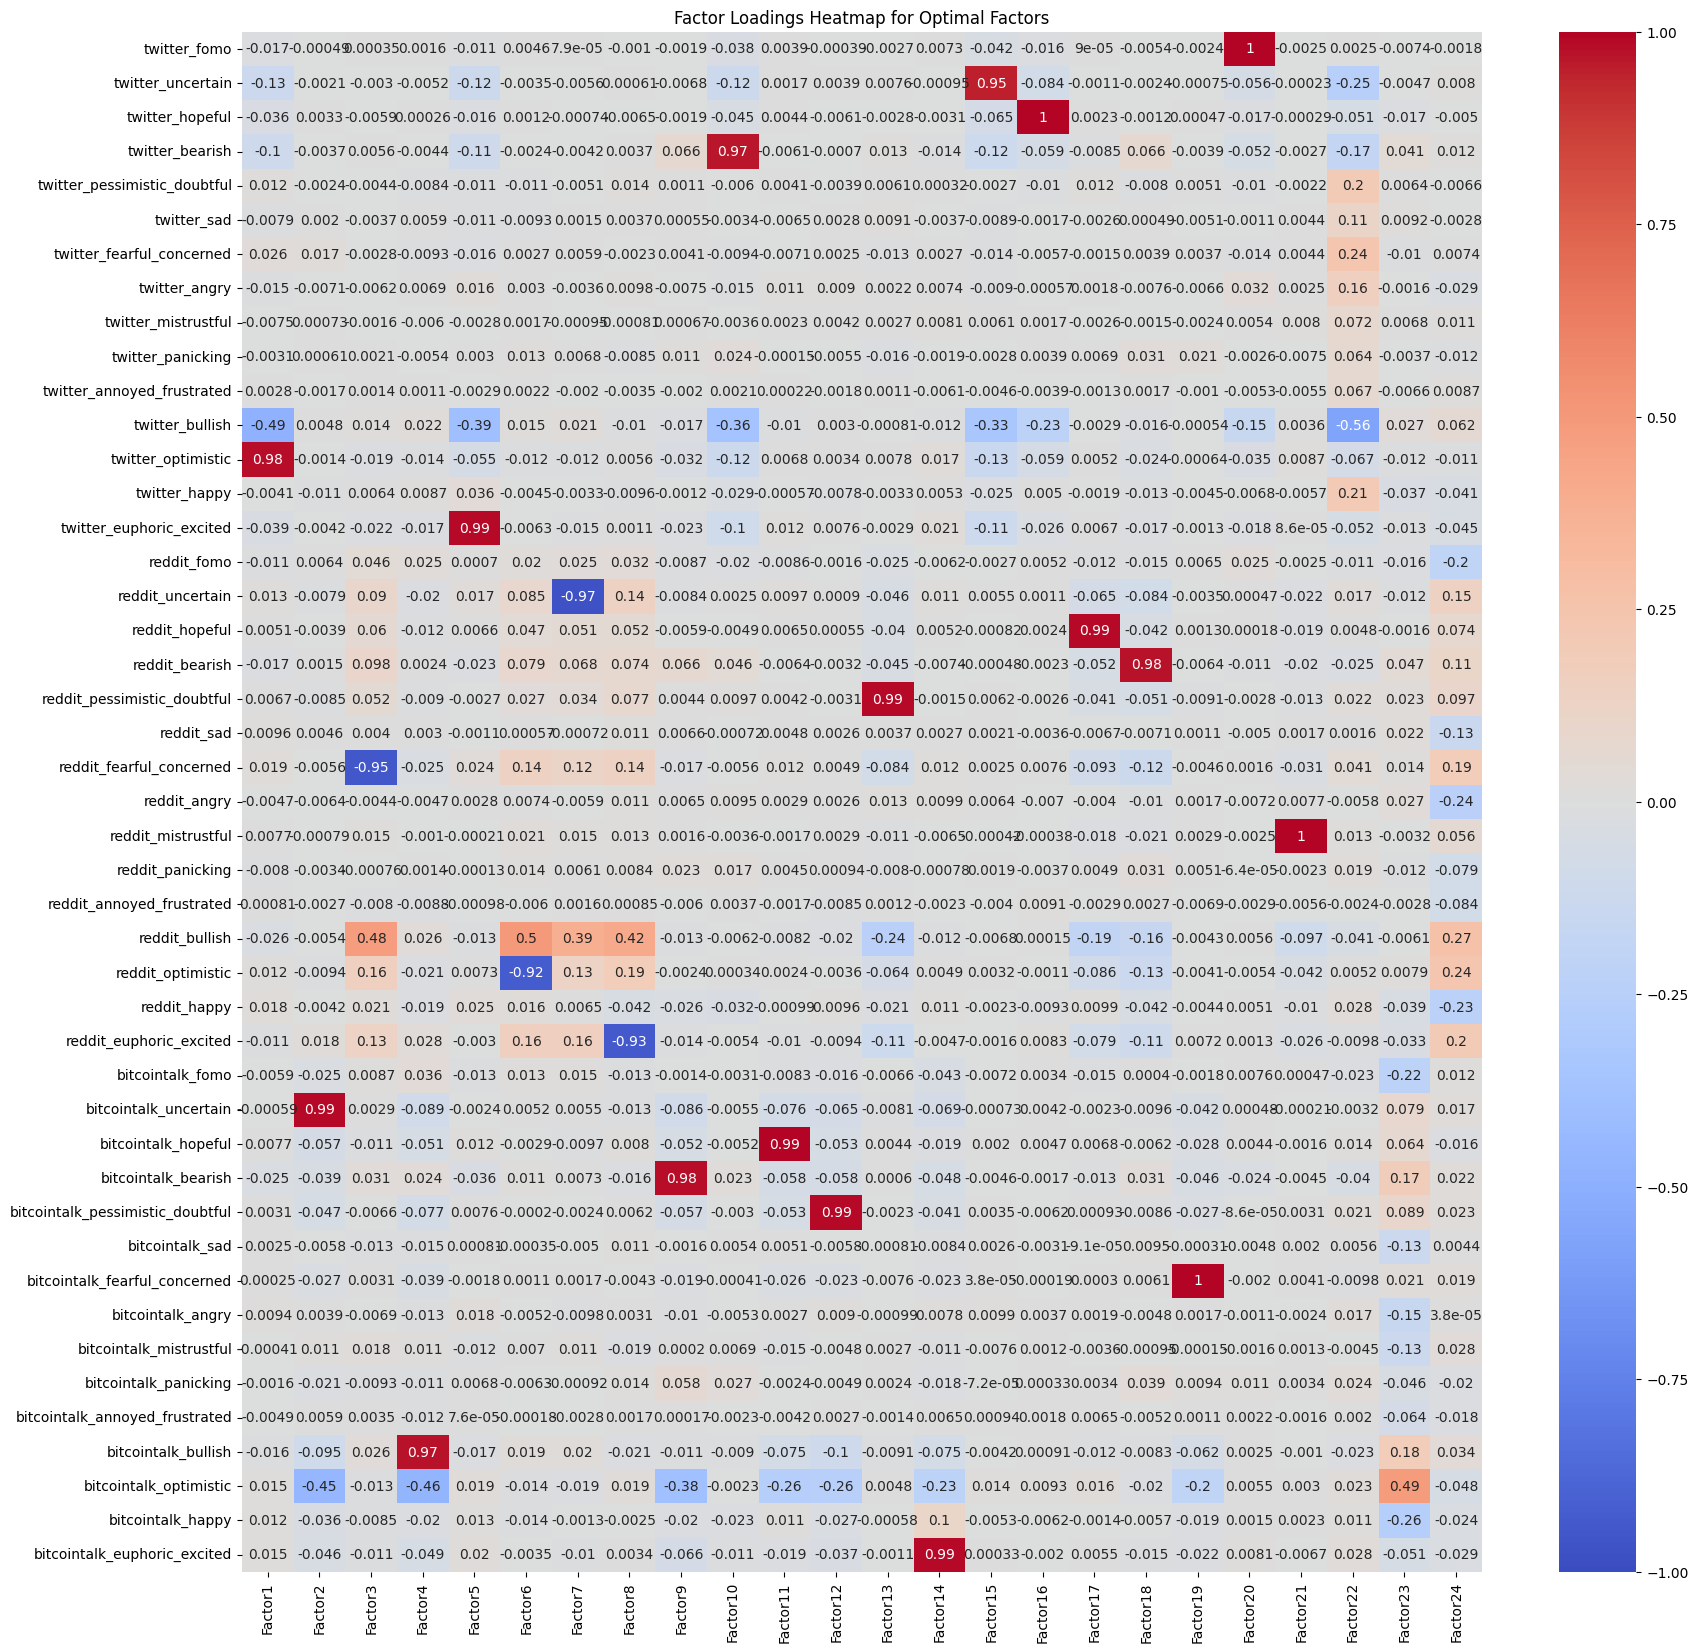

Factor1   Factor2   Factor3   Factor4  \
twitter_fomo                     -0.016720 -0.000489  0.000353  0.001608   
twitter_uncertain                -0.125289 -0.002115 -0.002992 -0.005222   
twitter_hopeful                  -0.035634  0.003273 -0.005871  0.000258   
twitter_bearish                  -0.104967 -0.003730  0.005577 -0.004390   
twitter_pessimistic_doubtful      0.011780 -0.002404 -0.004427 -0.008427   
twitter_sad                      -0.007853  0.001990 -0.003737  0.005866   
twitter_fearful_concerned         0.025843  0.017103 -0.002792 -0.009276   
twitter_angry                    -0.014698 -0.007109 -0.006244  0.006944   
twitter_mistrustful              -0.007527  0.000727 -0.001561 -0.006041   
twitter_panicking                -0.003109  0.000611  0.002127 -0.005440   
twitter_annoyed_frustrated        0.002757 -0.001742  0.001424  0.001111   
twitter_bullish                  -0.487972  0.004803  0.013529  0.022392   
twitter_optimistic                0.983327 -0.001367 -0.019008 -0.013783   
twitter_happy                    -0.004135 -0.011335  0.006443  0.008672   
twitter_euphoric_excited         -0.038610 -0.004161 -0.021501 -0.016623   
reddit_fomo                      -0.011137  0.006374  0.045860  0.025182   
reddit_uncertain                  0.013485 -0.007898  0.089518 -0.020057   
reddit_hopeful                    0.005149 -0.003919  0.059766 -0.012297   
reddit_bearish                   -0.017035  0.001458  0.097723  0.002437   
reddit_pessimistic_doubtful       0.006711 -0.008471  0.051564 -0.008963   
reddit_sad                        0.009570  0.004599  0.003993  0.003044   
reddit_fearful_concerned          0.019327 -0.005616 -0.945983 -0.024806   
reddit_angry                     -0.004739 -0.006369 -0.004350 -0.004650   
reddit_mistrustful                0.007726 -0.000794  0.015297 -0.001036   
reddit_panicking                 -0.007991 -0.003445 -0.000759  0.001383   
reddit_annoyed_frustrated         0.000807 -0.002739 -0.008010 -0.008805   
reddit_bullish                   -0.025636 -0.005447  0.476976  0.026327   
reddit_optimistic                 0.012314 -0.009441  0.157338 -0.020746   
reddit_happy                      0.017672 -0.004248  0.021167 -0.019388   
reddit_euphoric_excited          -0.010663  0.017998  0.130054  0.028482   
bitcointalk_fomo                 -0.005857 -0.024854  0.008691  0.035539   
bitcointalk_uncertain            -0.000591  0.987212  0.002867 -0.089193   
bitcointalk_hopeful               0.007692 -0.057311 -0.011036 -0.051100   
bitcointalk_bearish              -0.025222 -0.039120  0.030741  0.023765   
bitcointalk_pessimistic_doubtful  0.003105 -0.047408 -0.006592 -0.077280   
bitcointalk_sad                   0.002469 -0.005788 -0.012900 -0.015268   
bitcointalk_fearful_concerned     0.000247 -0.026754  0.003076 -0.039195   
bitcointalk_angry                 0.009409  0.003850 -0.006885 -0.013001   
bitcointalk_mistrustful          -0.000414  0.010508  0.018303  0.011038   
bitcointalk_panicking            -0.001552 -0.021324 -0.009268 -0.010651   
bitcointalk_annoyed_frustrated   -0.004929  0.005935  0.003526 -0.011587   
bitcointalk_bullish              -0.015618 -0.094710  0.025615  0.968959   
bitcointalk_optimistic            0.014681 -0.449283 -0.012516 -0.464675   
bitcointalk_happy                 0.011749 -0.035922 -0.008460 -0.020185   
bitcointalk_euphoric_excited      0.015366 -0.045882 -0.010680 -0.049264   

                                   Factor5   Factor6   Factor7   Factor8  \
twitter_fomo                     -0.010515  0.004647  0.000079 -0.001011   
twitter_uncertain                -0.122989 -0.003484 -0.005621  0.000612   
twitter_hopeful                  -0.015735  0.001235 -0.000735 -0.006526   
twitter_bearish                  -0.107981 -0.002386 -0.004198  0.003653   
twitter_pessimistic_doubtful     -0.010631 -0.010804 -0.005116  0.014414   
twitter_sad                      -0.010833 -0.009289  0.001453  0.003668   
twitte

In [141]:
#Computing factors with rotation
optimal_factors = 24

# Perform EFA with the optimal number of factors
fat_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fat_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fat_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt

- Using some feature engineering and factor analysis we succesfully reduced the number of features in the dataset, while reducing colinearity between features and dropping noise from the dataset (dropping the last principal component).